## Website Statistics Analysis for E-commerce Optimization

# Background:
In the dynamic landscape of e-commerce, understanding user behavior and website
performance is crucial for optimizing conversions and maximizing revenue. The provided
dataset offers a comprehensive view of user interactions on an e-commerce website,
encompassing various dimensions such as page visits, session durations, traffic sources, and
purchase behavior.

#Objective:
The objective of this project is to leverage the dataset to analyze website statistics and derive
actionable insights aimed at enhancing the e-commerce platform's performance and
maximizing revenue generation. By examining user engagement metrics, traffic patterns, and
transactional data, the goal is to identify areas of improvement and formulate strategic
recommendations for optimization.


In [374]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import ttest_ind,chi2_contingency,f_oneway
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler

In [375]:
!wget "https://drive.google.com/uc?export=download&id=1FN2Uh6DW7ShEIcQCWE6NWqnZLHCouh9e" -O shopping.csv

--2025-05-27 10:58:13--  https://drive.google.com/uc?export=download&id=1FN2Uh6DW7ShEIcQCWE6NWqnZLHCouh9e
Resolving drive.google.com (drive.google.com)... 74.125.139.102, 74.125.139.139, 74.125.139.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.139.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1FN2Uh6DW7ShEIcQCWE6NWqnZLHCouh9e&export=download [following]
--2025-05-27 10:58:13--  https://drive.usercontent.google.com/download?id=1FN2Uh6DW7ShEIcQCWE6NWqnZLHCouh9e&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.219.132, 2607:f8b0:400c:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.219.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1072063 (1.0M) [application/octet-stream]
Saving to: ‘shopping.csv’

shopping.csv        100%[===================>]   1.02M  --.-KB/s

In [376]:
Shopping = pd.read_csv("shopping.csv")

In [377]:
Shopping

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]

In [378]:
#to view columns

Shopping.columns
#df.keys()== df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [379]:
#view first 5 rows/records
Shopping.head(5)
#view first 5 rows/records default=5
#Shopping.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [380]:
#view last 5 rows/records,deafault=5
Shopping.tail()
#view last 5 rows/records
#Shopping.tail(5)

Administrative  Administrative_Duration  Informational  \
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False

In [381]:
#To get index of dataframe
Shopping.index

RangeIndex(start=0, stop=12330, step=1)

In [382]:
#To get shape information

Shopping.shape

#12330 rows and 18 columns

(12330, 18)

In [383]:
# to get dimensional detail of dataframe

Shopping.ndim

#2D

2

In [384]:
#Datatype

print(Shopping.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [385]:
Shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#Preprocessing of Data:

*1) Data Cleaning: Identify and handle missing values, correct data entry errors, and ensure consistency in data formats*

In [386]:
Shopping.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

- No missing values

In [387]:
Shopping.duplicated().value_counts()

False    12205
True       125
Name: count, dtype: int64

In [388]:
# duplicates data

duplicated_data=Shopping.loc[Shopping.duplicated()]
duplicated_data

Administrative  Administrative_Duration  Informational  \
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
418                 0                      0.0              0   
456                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
158                       0.0               1                      0.0   
159                       0.0               1                      0.0   
178                       0.0               1                      0.0   
418                       0.0               1                      0.0   
456                       0.0               1                      0.0   
...                       ...             ...                      ...   
11934                     0.0               1                      0.0   
11938                     0.0               1                      0.0   
12159                     0.0               1                      0.0   
12180                     0.0               1                      0.0   
12185                     0.0               1                      0.0   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
158            0.2        0.2         0.0         0.0   Feb                 1   
159            0.2        0.2         0.0         0.0   Feb                 3   
178            0.2        0.2         0.0         0.0   Feb                 3   
418            0.2        0.2         0.0         0.0   Mar                 1   
456            0.2        0.2         0.0         0.0   Mar                 2   
...            ...        ...         ...         ...   ...               ...   
11934          0.2        0.2         0.0         0.0   Dec                 1   
11938          0.2        0.2         0.0         0.0   Dec                 1   
12159          0.2        0.2         0.0         0.0   Dec                 1   
12180          0.2        0.2         0.0         0.0   Dec                 1   
12185          0.2        0.2         0.0         0.0   Dec                 8   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
158          1       1            3  Returning_Visitor    False    False  
159          2       3            3  Returning_Visitor    False    False  
178          2       3            3  Returning_Visitor    False    False  
418          1       1            1  Returning_Visitor     True    False  
456          2       4            1  Returning_Visitor    False    False  
...        ...     ...          ...                ...      ...      ...  
11934        1       1            2        New_Visitor    False    False  
11938        1       4            1  Returning_Visitor     True    False  
12159        1       1            3  Returning_Visitor    False    False  
12180       13       9           20  Returning_Visitor    False    False  
12185       13       9           20              Other    False    False  

[125 rows x 18 columns]

In [389]:
#remove duplicates

Shopping.drop_duplicates(keep='first',inplace=True)

In [390]:
Shopping.duplicated().value_counts()

False    12205
Name: count, dtype: int64

In [391]:
Shopping.describe(include='all')

Administrative  Administrative_Duration  Informational  \
count     12205.000000             12205.000000   12205.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.338878                81.646331       0.508726   
std           3.330436               177.491845       1.275617   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 9.000000       0.000000   
75%           4.000000                94.700000       0.000000   
max          27.000000              3398.750000      24.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             12205.000000    12205.000000             12205.000000   
unique                     NaN             NaN                      NaN   
top                        NaN             NaN                      NaN   
freq                       NaN             NaN                      NaN   
mean                 34.825454       32.045637              1206.982457   
std                 141.424807       44.593649              1919.601400   
min                   0.000000        0.000000                 0.000000   
25%                   0.000000        8.000000               193.000000   
50%                   0.000000       18.000000               608.942857   
75%                   0.000000       38.000000              1477.154762   
max                2549.375000      705.000000             63973.522230   

         BounceRates     ExitRates    PageValues    SpecialDay  Month  \
count   12205.000000  12205.000000  12205.000000  12205.000000  12205   
unique           NaN           NaN           NaN           NaN     10   
top              NaN           NaN           NaN           NaN    May   
freq             NaN           NaN           NaN           NaN   3329   
mean        0.020370      0.041466      5.949574      0.061942    NaN   
std         0.045255      0.046163     18.653671      0.199666    NaN   
min         0.000000      0.000000      0.000000      0.000000    NaN   
25%         0.000000      0.014231      0.000000      0.000000    NaN   
50%         0.002899      0.025000      0.000000      0.000000    NaN   
75%         0.016667      0.048529      0.000000      0.000000    NaN   
max         0.200000      0.200000    361.763742      1.000000    NaN   

        OperatingSystems       Browser        Region   TrafficType  \
count       12205.000000  12205.000000  12205.000000  12205.000000   
unique               NaN           NaN           NaN           NaN   
top                  NaN           NaN           NaN           NaN   
freq                 NaN           NaN           NaN           NaN   
mean            2.124211      2.357804      3.153298      4.073904   
std             0.906823      1.710114      2.402340      4.016654   
min             1.000000      1.000000      1.000000      1.000000   
25%             2.000000      2.000000      1.000000      2.000000   
50%             2.000000      2.000000      3.000000      2.000000   
75%             3.000000      2.000000      4.000000      4.000000   
max             8.000000     13.000000      9.000000     20.000000   

              VisitorType Weekend Revenue  
count               12205   12205   12205  
unique                  3       2       2  
top     Returning_Visitor   False   False  
freq                10431    9346   10297  
mean                  NaN     NaN     NaN  
std                   NaN     NaN     NaN  
min                   NaN     NaN     NaN  
25%                   NaN     NaN     NaN  
50%                   NaN     NaN     NaN  
75%                   NaN     NaN     NaN  
max                   NaN     NaN     NaN

In [392]:
for i in Shopping.columns:
  print('Value count in',i,'column are :-')
  print(Shopping[i].value_counts())
  print('-'*70)

Value count in Administrative column are :-
Administrative
0     5643
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in Administrative_Duration column are :-
Administrative_Duration
0.000000      5778
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
65.600000        1
552.200000       1
206.250000       1
401.150000       1
315.966667       1
Name: count, Length: 3335, dtype: int64
----------------------------------------------------------------------
Value count in Informational column are :-
Informational
0     9574
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9    

In [393]:
Shopping

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12205 rows x 18 columns]

In [394]:
#Datatype Conversion

# Convert columns to categorical types
Shopping['VisitorType'] = Shopping['VisitorType'].astype('category')
Shopping['Weekend'] = Shopping['Weekend'].astype('category')
#Shopping['Revenue'] = Shopping['Revenue'].astype('category')
Shopping['Month'] = Shopping['Month'].astype('category')
Shopping['OperatingSystems'] = Shopping['OperatingSystems'].astype('category')
Shopping['Browser'] = Shopping['Browser'].astype('category')
Shopping["SpecialDay"] = Shopping["SpecialDay"].astype("category")
#Shopping["Region"] = Shopping["Region"].astype("category")



In [395]:

# Define custom bins and labels based on traffic patterns
bins = [0, 5, 10, 15, 20]  # Adjust bin ranges based on your data
labels = ["Low", "Medium", "High", "Very High"]  # Meaningful categories

# Apply binning
Shopping["TrafficType_Category"] = pd.cut(Shopping["TrafficType"], bins=bins, labels=labels).astype("category")



In [396]:
Shopping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12205 non-null  int64   
 1   Administrative_Duration  12205 non-null  float64 
 2   Informational            12205 non-null  int64   
 3   Informational_Duration   12205 non-null  float64 
 4   ProductRelated           12205 non-null  int64   
 5   ProductRelated_Duration  12205 non-null  float64 
 6   BounceRates              12205 non-null  float64 
 7   ExitRates                12205 non-null  float64 
 8   PageValues               12205 non-null  float64 
 9   SpecialDay               12205 non-null  category
 10  Month                    12205 non-null  category
 11  OperatingSystems         12205 non-null  category
 12  Browser                  12205 non-null  category
 13  Region                   12205 non-null  int64   
 14  TrafficType

#Univariate Analysis:

*1)Numerical Features: Plot histograms or box plots for each numerical feature (e.g.,
Administrative, Informational, ProductRelated, durations, BounceRates, ExitRates,
PageValues) to identify outliers and understand their distribution.*


In [397]:
# Define numerical columns
num_col = [
    "Administrative","Administrative_Duration","Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration", "BounceRates",
    "ExitRates", "PageValues",
]


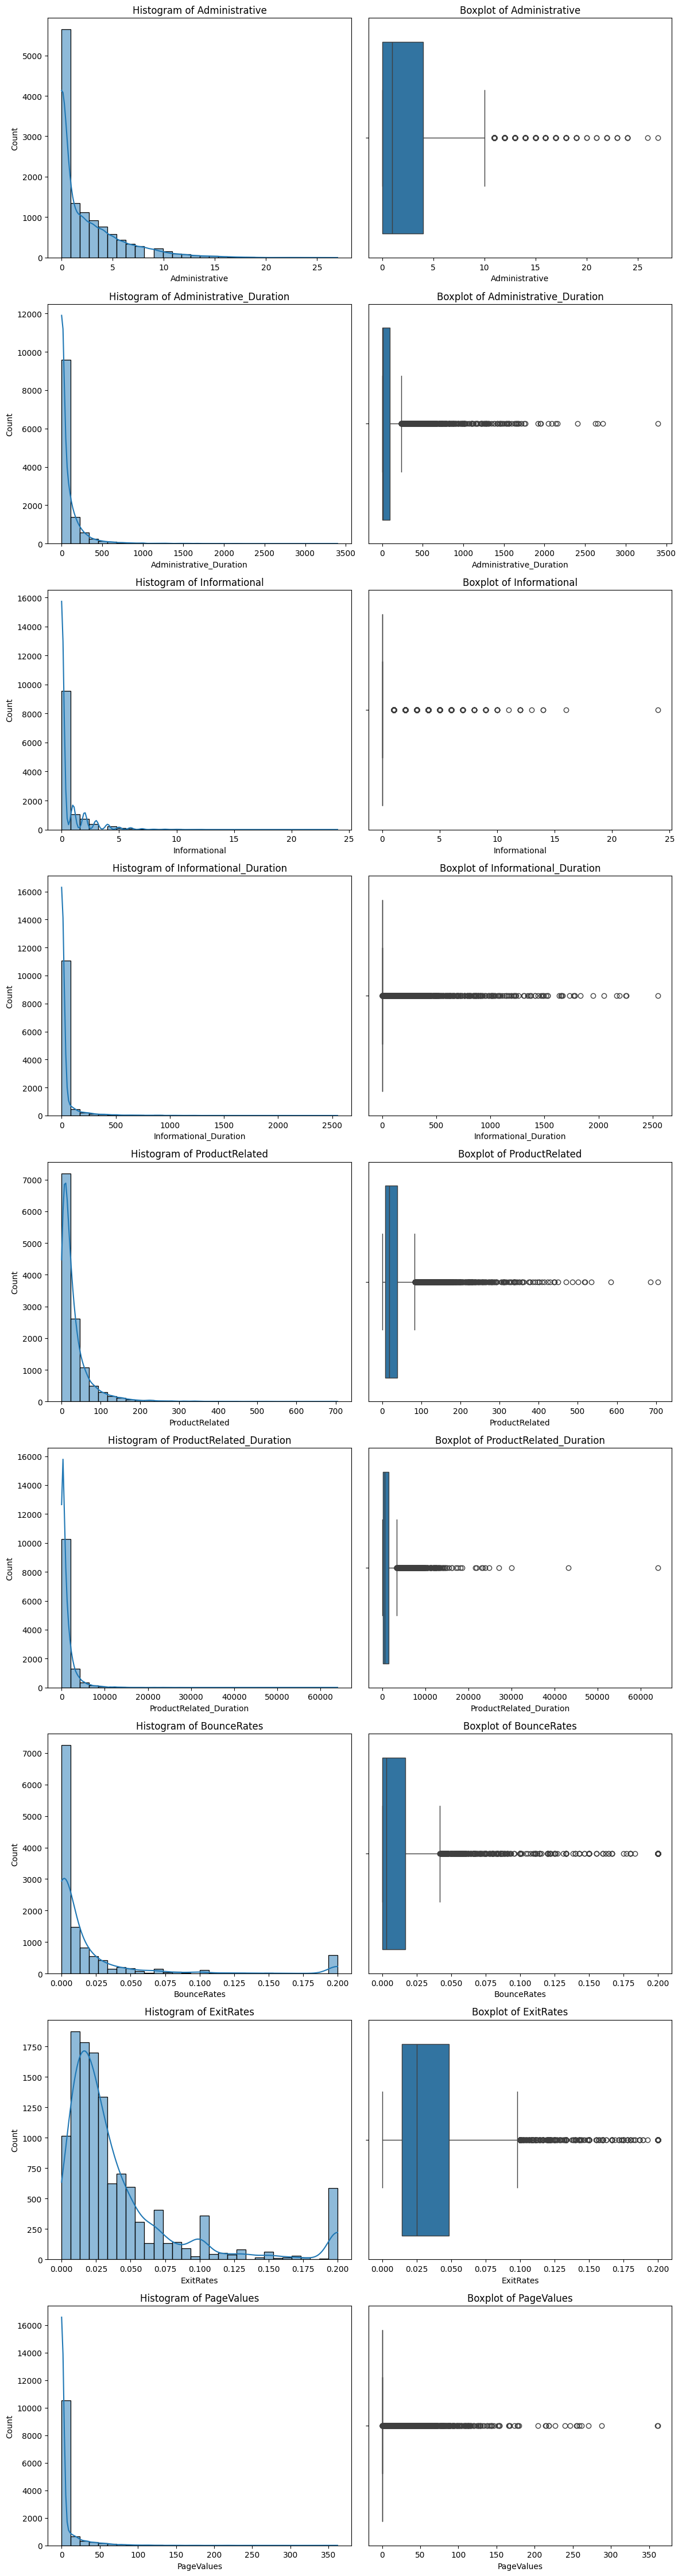

In [398]:

# Create subplots for better visualization
fig, axes = plt.subplots(len(num_col), 2, figsize=(12, 5 * len(num_col)))

# Loop through columns and plot histograms & boxplots
for i, col in enumerate(num_col):
    sns.histplot(Shopping[col], bins=30, kde=True, ax=axes[i, 0])  # Histogram
    axes[i, 0].set_title(f"Histogram of {col}")

    sns.boxplot(x=Shopping[col], ax=axes[i, 1])  # Boxplot
    axes[i, 1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [399]:
#Check for Outliers and deal with them accordingly


# IQR Method to find outliers and plot boxplots
for column in num_col:
    Q1 = Shopping[column].quantile(0.25)
    Q3 = Shopping[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(column)
    print("Q1: ",Q1)
    print("Q3: ",Q3)
    print("IQR: ",IQR)
    print("Lower Bound: ", lower_bound)
    print("Upper Bound: ", upper_bound)
    outliers = Shopping[(Shopping[column] < lower_bound) | (Shopping[column] > upper_bound)]

    if outliers.empty:
      print("No,Outliers Detected for ", column , "\n")
    else:
      print(f"Outliers in {column} (IQR Method): ")
      print(outliers)

Administrative
Q1:  0.0
Q3:  4.0
IQR:  4.0
Lower Bound:  -6.0
Upper Bound:  10.0
Outliers in Administrative (IQR Method): 
       Administrative  Administrative_Duration  Informational  \
62                 12               279.416667              0   
248                16               155.631313              0   
282                13              1249.809524              4   
288                11               215.523809              1   
478                13               315.966667              1   
...               ...                      ...            ...   
12209              12               257.750000              0   
12221              12               317.628205              2   
12233              13               399.750000              3   
12236              12               219.274359              4   
12244              19               739.194872              1   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
62                   0

Administrative lower bound : 0.0
Administrative upper bound : 9.0
Administrative_Duration lower bound : 0.0
Administrative_Duration upper bound : 352.2080952199999
Informational lower bound : 0.0
Informational upper bound : 3.0
Informational_Duration lower bound : 0.0
Informational_Duration upper bound : 199.0
ProductRelated lower bound : 2.0
ProductRelated upper bound : 110.0
ProductRelated_Duration lower bound : 0.0
ProductRelated_Duration upper bound : 4312.9562823999995
BounceRates lower bound : 0.0
BounceRates upper bound : 0.14933333339999758
ExitRates lower bound : 0.004545455
ExitRates upper bound : 0.17371428579999965
PageValues lower bound : 0.0
PageValues upper bound : 38.301456531999975


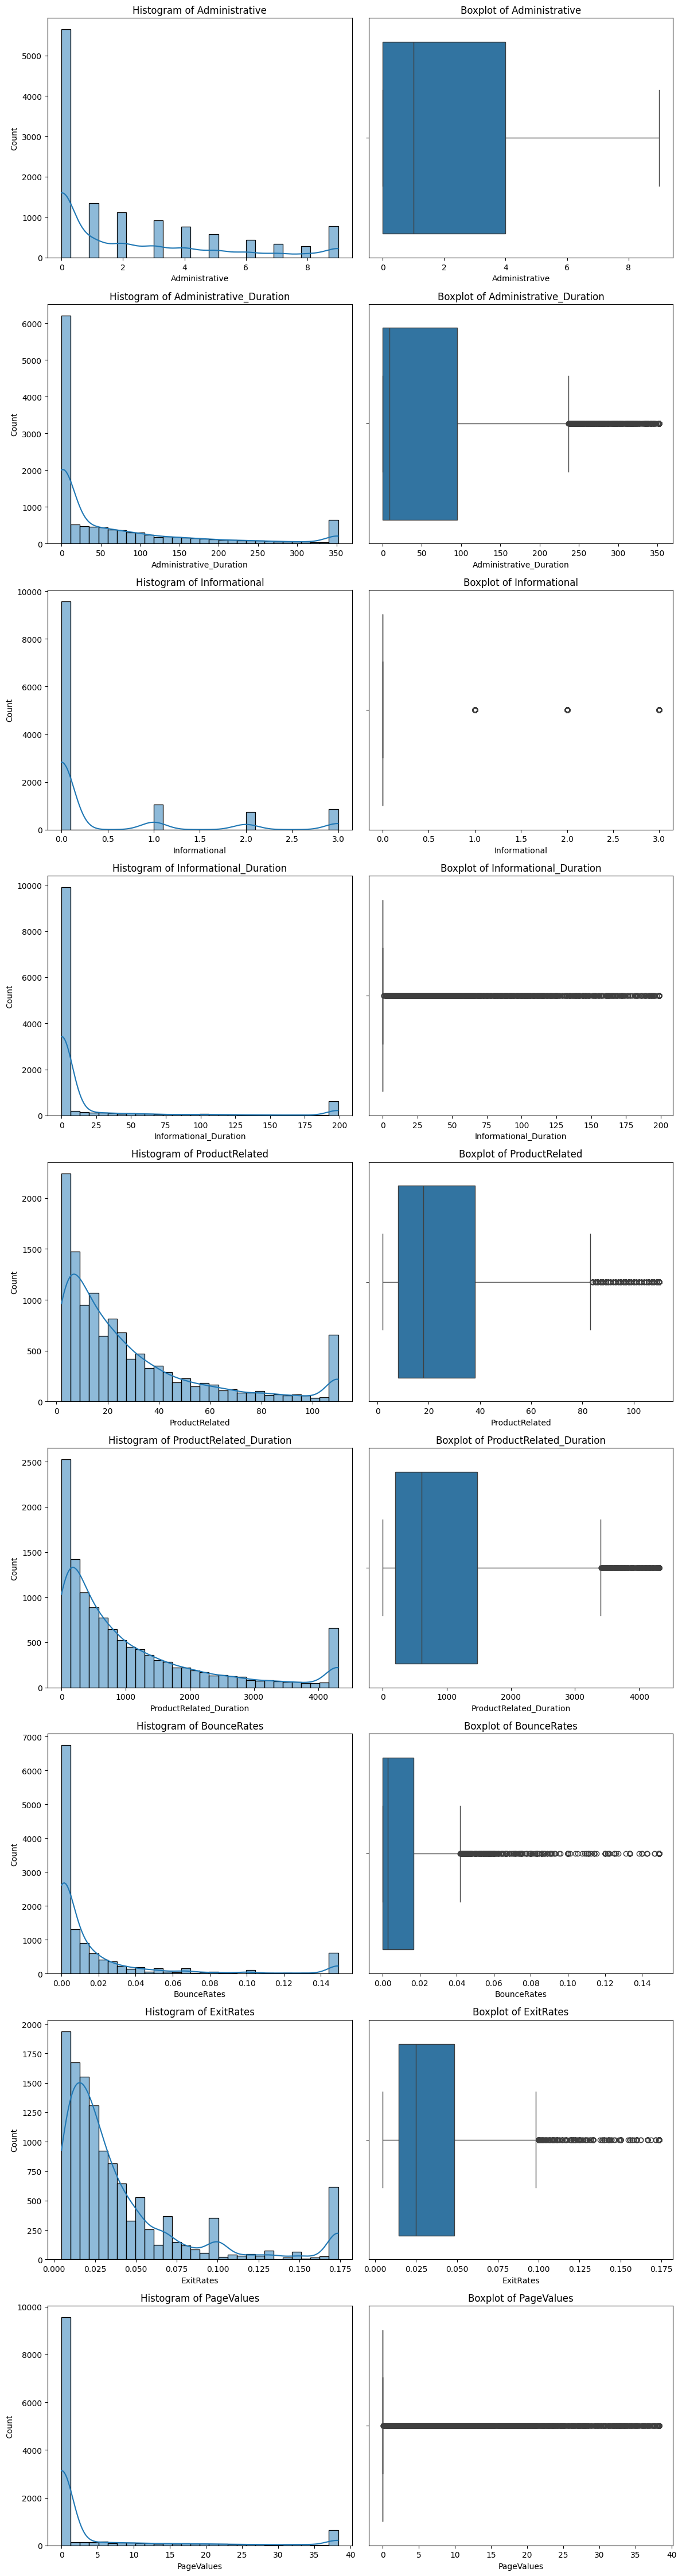

In [400]:
#b) Remove/clip the data between the 5 percentile and 95 percentile

# Clip the data between the 5th percentile and 95th percentile
for column in num_col:
  lower_bound = np.percentile(Shopping[column], 5)
  upper_bound = np.percentile(Shopping[column], 95)
  print(column,"lower bound :",lower_bound)
  print(column,"upper bound :",upper_bound)
  Shopping[column] = np.clip(Shopping[column], lower_bound, upper_bound)
  # Plot the results as bar plots

# Create subplots for better visualization
fig, axes = plt.subplots(len(num_col), 2, figsize=(12, 5 * len(num_col)))

# Loop through columns and plot histograms & boxplots
for i, col in enumerate(num_col):
    sns.histplot(Shopping[col], bins=30, kde=True, ax=axes[i, 0])  # Histogram
    axes[i, 0].set_title(f"Histogram of {col}")

    sns.boxplot(x=Shopping[col], ax=axes[i, 1])  # Boxplot
    axes[i, 1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


*2) Categorical Features: Analyze the distribution of categorical variables (e.g., Month,OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend).*

In [401]:
Shopping.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                 category
Month                      category
OperatingSystems           category
Browser                    category
Region                        int64
TrafficType                   int64
VisitorType                category
Weekend                    category
Revenue                        bool
TrafficType_Category       category
dtype: object

<Figure size 1500x1000 with 0 Axes>

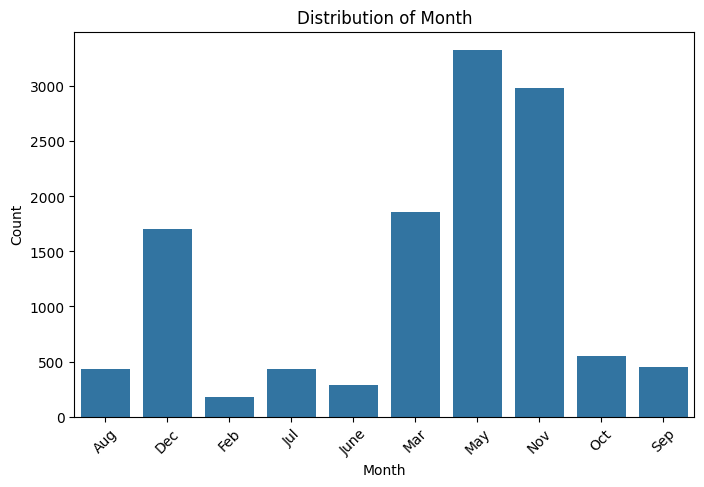

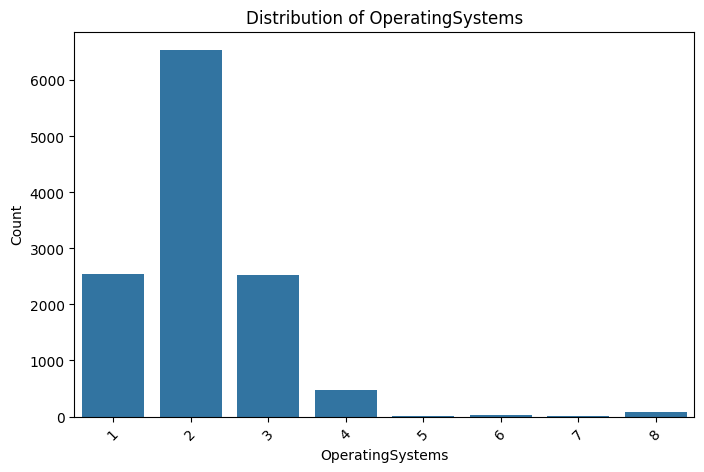

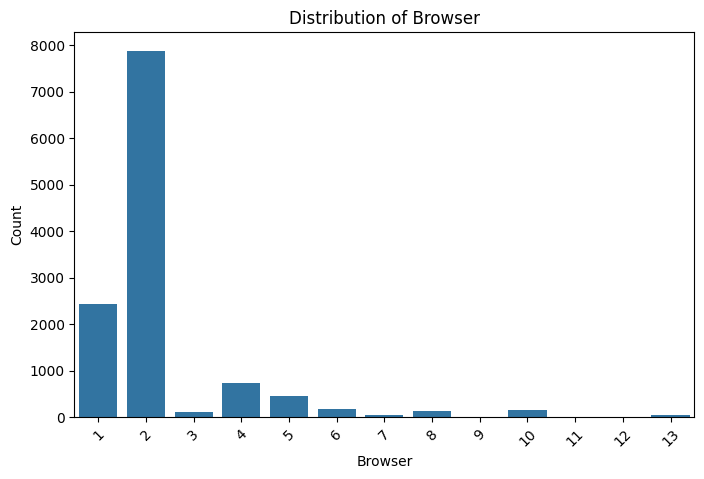

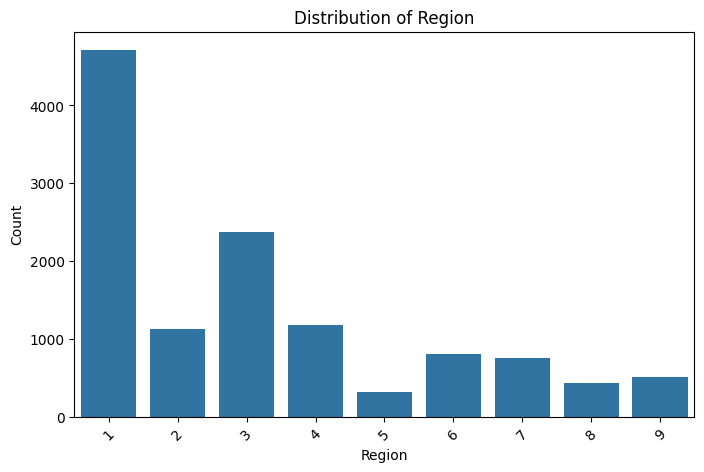

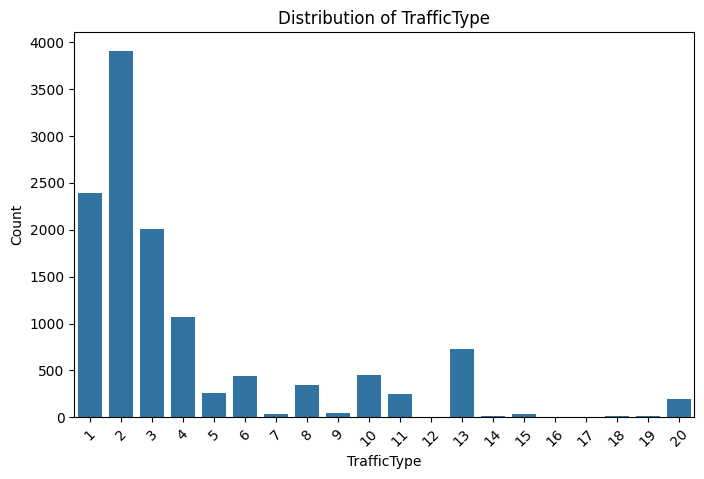

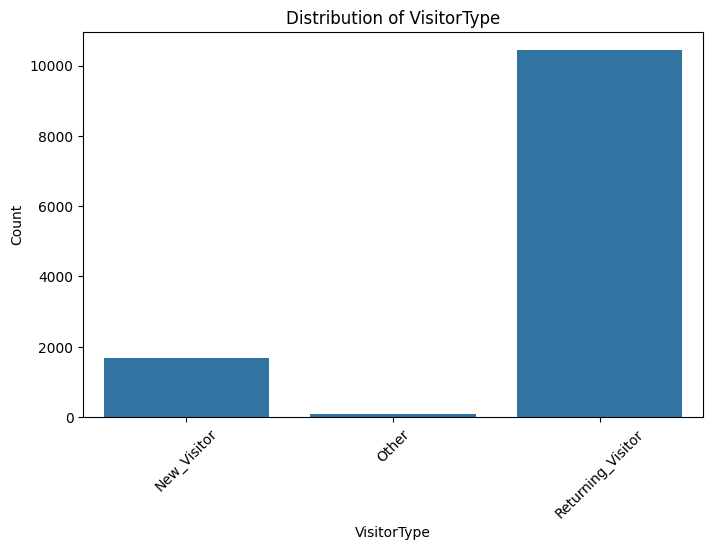

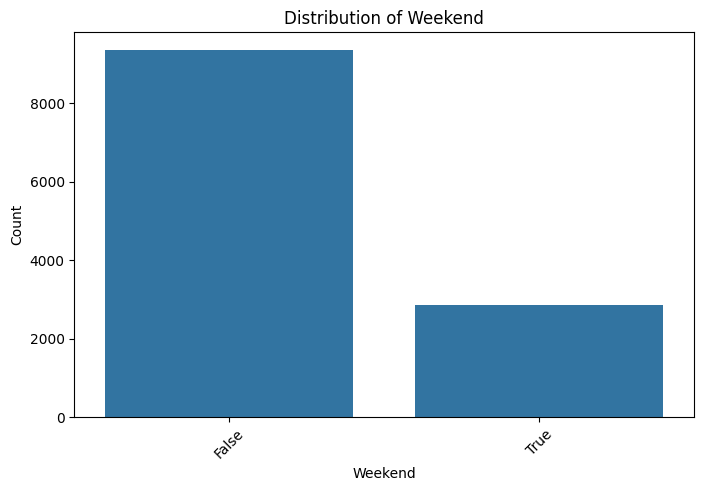

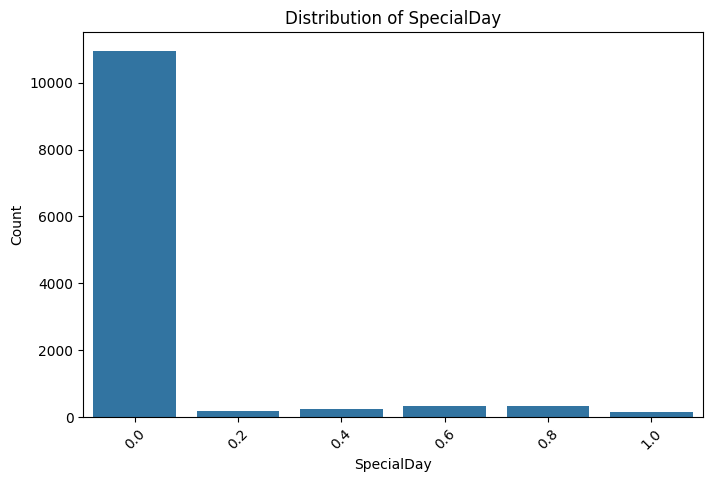

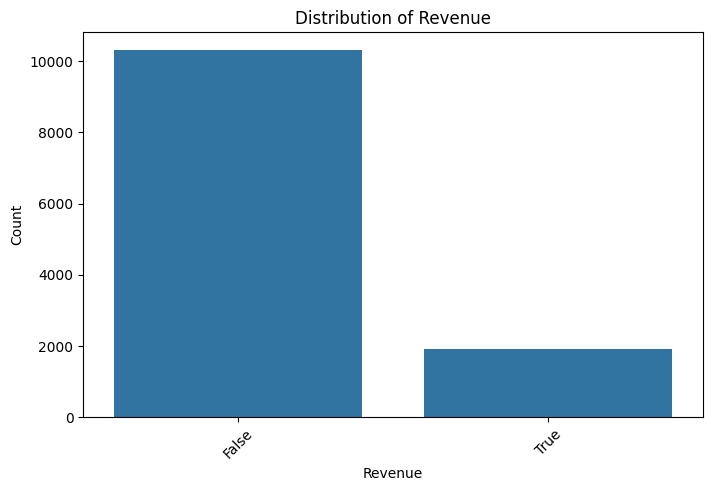

In [402]:
cat_col=["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend","SpecialDay","Revenue"]

# Set figure size for better readability
plt.figure(figsize=(15, 10))

# Loop through categorical columns and plot countplots
for i in cat_col:
    plt.figure(figsize=(8, 5))  # Create individual figures for clarity
    sns.countplot(x=Shopping[i])
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(f"Distribution of {i}")
    plt.xticks(rotation=45)  # Rotate labels if necessary for readability
    plt.show()

#3) Correlation Analysis:
● Correlation Matrix: Calculate the correlation coefficients between numerical features to identify potential relationships

● Visualization: Use heatmaps to visualize these correlations and detect multicollinearity or interesting relationships.


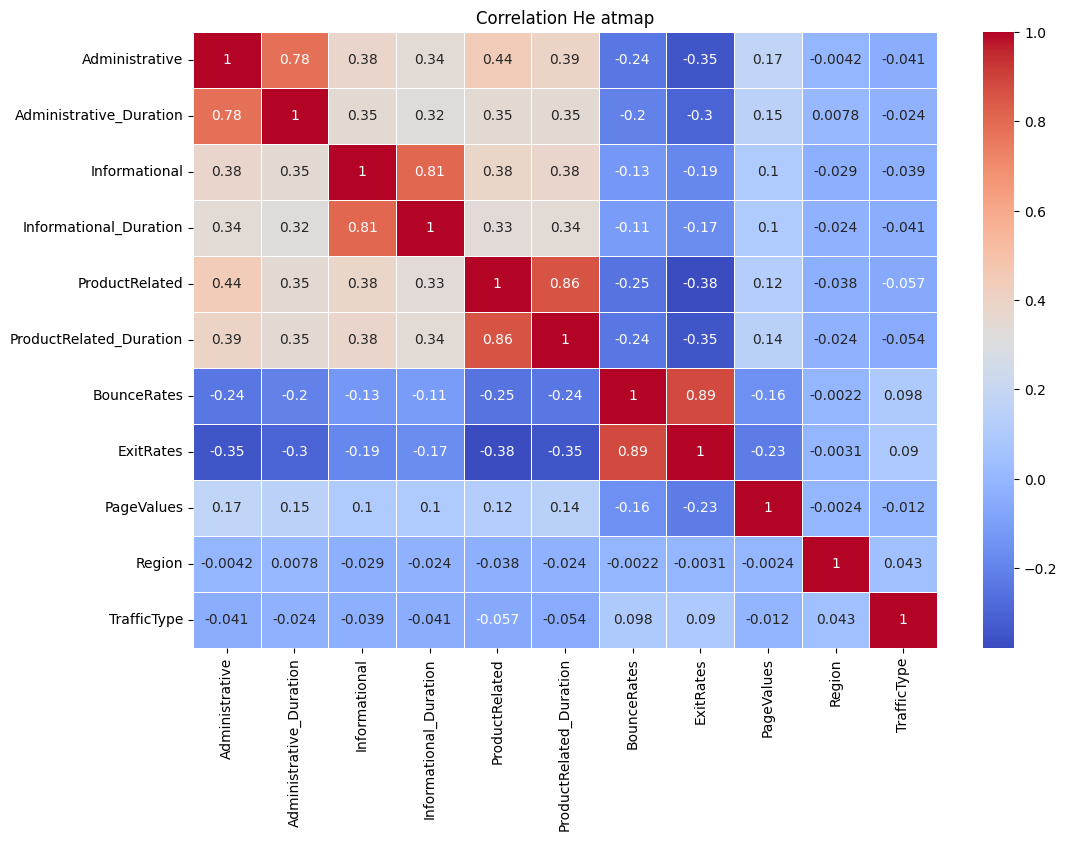

In [403]:
# Filter numerical columns
numerical_df = Shopping.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numerical columns only
corr_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation He atmap')
plt.show()

In [404]:
corr_matrix

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.780963   
Administrative_Duration        0.780963                 1.000000   
Informational                  0.379048                 0.346333   
Informational_Duration         0.342682                 0.319677   
ProductRelated                 0.441843                 0.345111   
ProductRelated_Duration        0.391416                 0.346770   
BounceRates                   -0.242714                -0.202389   
ExitRates                     -0.351370                -0.299575   
PageValues                     0.174071                 0.154168   
Region                        -0.004176                 0.007849   
TrafficType                   -0.040853                -0.024272   

                         Informational  Informational_Duration  \
Administrative                0.379048                0.342682   
Administrative_Duration       0.346333                0.319677   
Informational                 1.000000                0.807223   
Informational_Duration        0.807223                1.000000   
ProductRelated                0.381903                0.334543   
ProductRelated_Duration       0.377512                0.340998   
BounceRates                  -0.129290               -0.110302   
ExitRates                    -0.188455               -0.167298   
PageValues                    0.100933                0.102614   
Region                       -0.029283               -0.023781   
TrafficType                  -0.039359               -0.041271   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.441843                 0.391416    -0.242714   
Administrative_Duration        0.345111                 0.346770    -0.202389   
Informational                  0.381903                 0.377512    -0.129290   
Informational_Duration         0.334543                 0.340998    -0.110302   
ProductRelated                 1.000000                 0.857416    -0.252870   
ProductRelated_Duration        0.857416                 1.000000    -0.244275   
BounceRates                   -0.252870                -0.244275     1.000000   
ExitRates                     -0.378991                -0.347775     0.886230   
PageValues                     0.124796                 0.142099    -0.156995   
Region                        -0.038489                -0.023844    -0.002172   
TrafficType                   -0.057154                -0.054154     0.097943   

                         ExitRates  PageValues    Region  TrafficType  
Administrative           -0.351370    0.174071 -0.004176    -0.040853  
Administrative_Duration  -0.299575    0.154168  0.007849    -0.024272  
Informational            -0.188455    0.100933 -0.029283    -0.039359  
Informational_Duration   -0.167298    0.102614 -0.023781    -0.041271  
ProductRelated           -0.378991    0.124796 -0.038489    -0.057154  
ProductRelated_Duration  -0.347775    0.142099 -0.023844    -0.054154  
BounceRates               0.886230   -0.156995 -0.002172     0.097943  
ExitRates                 1.000000   -0.226368 -0.003131     0.090323  
PageValues               -0.226368    1.000000 -0.002447    -0.011679  
Region                   -0.003131   -0.002447  1.000000     0.042873  
TrafficType               0.090323   -0.011679  0.042873     1.000000

In [405]:
# Generate insights from the correlation matrix
def generate_insights(corr_matrix):
    weak_negative_correlations = []
    weak_positive_correlations = []
    moderate_positive_correlations = []
    moderate_negative_correlations = []
    strong_positive_correlations = []
    strong_negative_correlations = []

    for col in corr_matrix.columns:
        for row in corr_matrix.index:
            if col != row:
                correlation = corr_matrix.loc[row, col]
                if -0.3 <= correlation <= 0:
                    weak_negative_correlations.append(f"Weak Negative correlation between {row} and {col}: {correlation:4f}")
                elif 0 < correlation <= 0.3:
                    weak_positive_correlations.append(f"Weak positive correlation between {row} and {col}: {correlation:4f}")
                elif 0.3 < correlation <= 0.7:
                    moderate_positive_correlations.append(f"Moderate positive correlation between {row} and {col}: {correlation:4f}")
                elif -0.7 <= correlation < -0.3:
                    moderate_negative_correlations.append(f"Moderate negative correlation between {row} and {col}: {correlation:4f}")
                elif correlation > 0.7:
                    strong_positive_correlations.append(f"Strong positive correlation between {row} and {col}: {correlation:4f}")
                elif correlation < -0.7:
                    strong_negative_correlations.append(f"Strong negative correlation between {row} and {col}: {correlation:4f}")

    return weak_negative_correlations,weak_positive_correlations, moderate_positive_correlations, moderate_negative_correlations, strong_positive_correlations, strong_negative_correlations

# Generate and print insights
weak_negative_correlations,weak_positive_correlations, moderate_positive_correlations, moderate_negative_correlations, strong_positive_correlations, strong_negative_correlations = generate_insights(corr_matrix)

print("🔍 INSIGHTS:\n")

print("Weak Positive Correlations:")
if weak_positive_correlations:
    for insight in weak_positive_correlations:
        print(insight)
else:
    print("There is no weak positive correlation")

print("Weak Negative Correlations:")
if weak_negative_correlations:
    for insight in weak_negative_correlations:
        print(insight)
else:
    print("There is no weak negative correlation")
print("\nModerate Positive Correlations:")
if moderate_positive_correlations:
    for insight in moderate_positive_correlations:
        print(insight)
else:
    print("There is no moderate positive correlation")

print("\nModerate Negative Correlations:")
if moderate_negative_correlations:
    for insight in moderate_negative_correlations:
        print(insight)
else:
    print("There is no moderate negative correlation")

print("\nStrong Positive Correlations:")
if strong_positive_correlations:
    for insight in strong_positive_correlations:
        print(insight)
else:
    print("There is no strong positive correlation")

print("\nStrong Negative Correlations:")
if strong_negative_correlations:
    for insight in strong_negative_correlations:
        print(insight)
else:
    print("There is no strong negative correlation")

🔍 INSIGHTS:

Weak Positive Correlations:
Weak positive correlation between PageValues and Administrative: 0.174071
Weak positive correlation between PageValues and Administrative_Duration: 0.154168
Weak positive correlation between Region and Administrative_Duration: 0.007849
Weak positive correlation between PageValues and Informational: 0.100933
Weak positive correlation between PageValues and Informational_Duration: 0.102614
Weak positive correlation between PageValues and ProductRelated: 0.124796
Weak positive correlation between PageValues and ProductRelated_Duration: 0.142099
Weak positive correlation between TrafficType and BounceRates: 0.097943
Weak positive correlation between TrafficType and ExitRates: 0.090323
Weak positive correlation between Administrative and PageValues: 0.174071
Weak positive correlation between Administrative_Duration and PageValues: 0.154168
Weak positive correlation between Informational and PageValues: 0.100933
Weak positive correlation between Infor

In [406]:
Shopping

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               2                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               2                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues SpecialDay Month OperatingSystems  \
0         0.149333   0.173714    0.000000        0.0   Feb                1   
1         0.000000   0.100000    0.000000        0.0   Feb                2   
2         0.149333   0.173714    0.000000        0.0   Feb                4   
3         0.050000   0.140000    0.000000        0.0   Feb                3   
4         0.020000   0.050000    0.000000        0.0   Feb                3   
...            ...        ...         ...        ...   ...              ...   
12325     0.007143   0.029031   12.241717        0.0   Dec                4   
12326     0.000000   0.021333    0.000000        0.0   Nov                3   
12327     0.083333   0.086667    0.000000        0.0   Nov                3   
12328     0.000000   0.021053    0.000000        0.0   Nov                2   
12329     0.000000   0.066667    0.000000        0.0   Nov                3   

      Browser  Region  TrafficType        VisitorType Weekend  Revenue  \
0           1       1            1  Returning_Visitor   False    False   
1           2       1            2  Returning_Visitor   False    False   
2           1       9            3  Returning_Visitor   False    False   
3           2       2            4  Returning_Visitor   False    False   
4           3       1            4  Returning_Visitor    True    False   
...       ...     ...          ...                ...     ...      ...   
12325       6       1            1  Returning_Visitor    True    False   
12326       2       1            8  Returning_Visitor    True    False   
12327       2       1           13  Returning_Visitor    True    False   
12328       2       3           11  Returning_Visitor   False    False   
12329       2       1            2        New_Visitor    True    False   

      TrafficType_Category  
0                      Low  
1                      Low  
2                      Low  
3                      Low  
4                      Low  
...                    ...  
12325                  Low  
12326               Medium  
12327                 High  
12328                 High  
12329                  Low  

[12205 rows x 19 columns]

#4) Class Distribution:
● Target Variable ('Revenue'): Check the distribution of the target variable to understand class balance and address any imbalances if necessary.


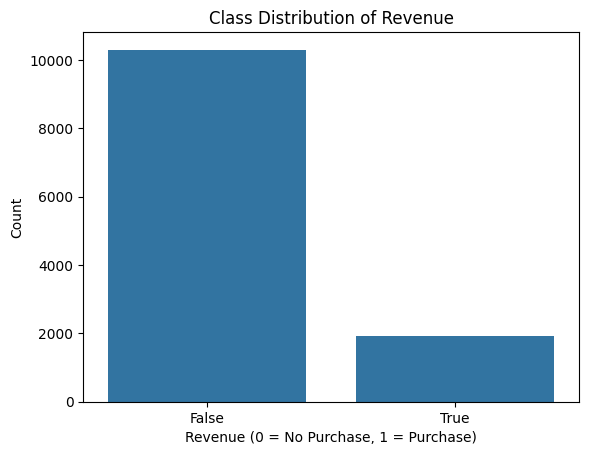

Revenue
False    84.367063
True     15.632937
Name: proportion, dtype: float64

In [407]:
#Plot the distribution of the target variable
sns.countplot(x=Shopping["Revenue"])
plt.xlabel("Revenue (0 = No Purchase, 1 = Purchase)")
plt.ylabel("Count")
plt.title("Class Distribution of Revenue")
plt.show()

# Check percentage balance
Shopping["Revenue"].value_counts(normalize=True) * 100

- Target variable, Revenue, is imbalanced, with approximately 84.37% of users not making a purchase and only 15.63% completing a transaction.

#5) Summarize Key Metrics:
● Page Views and Durations: Summarize the number of pages visited and the time spent in each category (Administrative, Informational, ProductRelated).


In [408]:
Administrative_sum=Shopping.groupby("Administrative")["Administrative_Duration"].sum()
Administrative_sum

Administrative
0         0.000000
1     53511.928186
2     85972.353390
3     93087.868769
4     95921.049704
5     83580.574882
6     72423.771820
7     58384.162112
8     59427.552452
9    200783.611443
Name: Administrative_Duration, dtype: float64

In [409]:
Informational_sum=Shopping.groupby("Informational")["Informational_Duration"].sum()
Informational_sum

Informational
0         0.000000
1     49788.078904
2     60351.135715
3    123023.724365
Name: Informational_Duration, dtype: float64

In [410]:
ProductRelated_sum=Shopping.groupby("ProductRelated")["ProductRelated_Duration"].sum()
ProductRelated_sum

ProductRelated
2      3.955612e+04
3      5.393926e+04
4      6.588666e+04
5      7.166228e+04
6      9.706337e+04
           ...     
106    4.898636e+04
107    4.650723e+04
108    4.370376e+04
109    3.791987e+04
110    2.427868e+06
Name: ProductRelated_Duration, Length: 109, dtype: float64

● Bounce and Exit Rates: Calculate average bounce and exit rates for each page category to identify high drop-off points.

In [411]:
# Grouping and calculating mean values of Administrative
Administrative_bounce_avg = Shopping.groupby("Administrative")["BounceRates"].mean()
Administrative_exit_avg = Shopping.groupby("Administrative")["ExitRates"].mean()

# Combine into a DataFrame
admin_stats = pd.DataFrame({
    "Administrative": Administrative_bounce_avg.index,
    "Administrative_BounceRates_Avg": Administrative_bounce_avg.values,
    "Administrative_ExitRates_Avg": Administrative_exit_avg.values
})

# Correcting the comparison logic within the DataFrame
admin_stats["Compare"] = np.where(
    admin_stats["Administrative_BounceRates_Avg"] > admin_stats["Administrative_ExitRates_Avg"],
    "Bounce average rate is higher",
    "Exit average rate is higher"
)

# Display DataFrame
admin_stats

Administrative  Administrative_BounceRates_Avg  \
0               0                        0.030081   
1               1                        0.010073   
2               2                        0.008365   
3               3                        0.007062   
4               4                        0.006452   
5               5                        0.007005   
6               6                        0.006103   
7               7                        0.005919   
8               8                        0.005761   
9               9                        0.005946   

   Administrative_ExitRates_Avg                      Compare  
0                      0.059766  Exit average rate is higher  
1                      0.028798  Exit average rate is higher  
2                      0.026542  Exit average rate is higher  
3                      0.023400  Exit average rate is higher  
4                      0.022215  Exit average rate is higher  
5                      0.021269  Exit average rate is higher  
6                      0.019696  Exit average rate is higher  
7                      0.019819  Exit average rate is higher  
8                      0.018846  Exit average rate is higher  
9                      0.018747  Exit average rate is higher

In [412]:
# Grouping and calculating mean values of Informational
Informational_bounce_avg = Shopping.groupby("Informational")["BounceRates"].mean()
Informational_exit_avg = Shopping.groupby("Informational")["ExitRates"].mean()

# Combine into a DataFrame
Informational_stats = pd.DataFrame({
    "Informational": Informational_bounce_avg.index,
    "Informational_BounceRates_Avg": Informational_bounce_avg.values,
    "Informational_ExitRates_Avg": Informational_exit_avg.values
})

# Correcting the comparison logic within the DataFrame
Informational_stats["Compare"] = np.where(
    Informational_stats["Informational_BounceRates_Avg"] >Informational_stats["Informational_ExitRates_Avg"],
    "Bounce average rate is higher",
    "Exit average rate is higher"
)

# Display DataFrame
Informational_stats

Informational  Informational_BounceRates_Avg  Informational_ExitRates_Avg  \
0              0                       0.020603                     0.044747   
1              1                       0.009035                     0.025291   
2              2                       0.007924                     0.024531   
3              3                       0.007707                     0.022197   

                       Compare  
0  Exit average rate is higher  
1  Exit average rate is higher  
2  Exit average rate is higher  
3  Exit average rate is higher

In [413]:
# Grouping and calculating mean values of ProductRelated
ProductRelated_bounce_avg = Shopping.groupby("ProductRelated")["BounceRates"].mean()
ProductRelated_exit_avg = Shopping.groupby("ProductRelated")["ExitRates"].mean()

# Combine into a DataFrame
ProductRelated_stats = pd.DataFrame({
    "ProductRelated": ProductRelated_bounce_avg.index,
    "ProductRelated_BounceRates_Avg": ProductRelated_bounce_avg.values,
    "ProductRelated_ExitRates_Avg": ProductRelated_exit_avg.values
})

# Correcting the comparison logic within the DataFrame
ProductRelated_stats["Compare"] = np.where(
    ProductRelated_stats["ProductRelated_BounceRates_Avg"] > ProductRelated_stats["ProductRelated_ExitRates_Avg"],
    "Bounce average rate is higher",
    "Exit average rate is higher"
)

# Display DataFrame
ProductRelated_stats

ProductRelated  ProductRelated_BounceRates_Avg  \
0                 2                        0.082509   
1                 3                        0.030250   
2                 4                        0.026255   
3                 5                        0.024468   
4                 6                        0.018760   
..              ...                             ...   
104             106                        0.006164   
105             107                        0.005906   
106             108                        0.006603   
107             109                        0.003670   
108             110                        0.005212   

     ProductRelated_ExitRates_Avg                      Compare  
0                        0.128969  Exit average rate is higher  
1                        0.075931  Exit average rate is higher  
2                        0.063683  Exit average rate is higher  
3                        0.057027  Exit average rate is higher  
4                        0.047934  Exit average rate is higher  
..                            ...                          ...  
104                      0.020460  Exit average rate is higher  
105                      0.018847  Exit average rate is higher  
106                      0.019869  Exit average rate is higher  
107                      0.012155  Exit average rate is higher  
108                      0.017219  Exit average rate is higher  

[109 rows x 4 columns]

#6) SpecialDay Analysis:
● Distribution Analysis: Explore the distribution of the SpecialDay feature and its values.

● Correlation with Revenue: Analyze how the proximity to special days correlates with
the likelihood of generating revenue

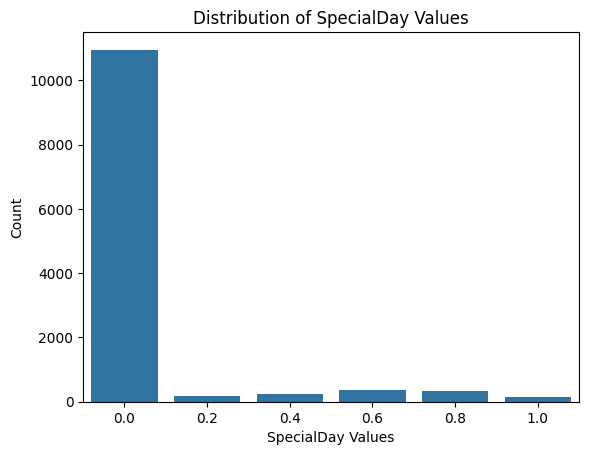

In [414]:
#1)Distribution:

# Countplot to see frequency of different SpecialDay values
sns.countplot(x=Shopping["SpecialDay"])
plt.xlabel("SpecialDay Values")
plt.ylabel("Count")
plt.title("Distribution of SpecialDay Values")
plt.show()


In [415]:
# Compute correlation
correlation = Shopping[["SpecialDay", "Revenue"]].corr()
print(correlation)

            SpecialDay   Revenue
SpecialDay    1.000000 -0.083601
Revenue      -0.083601  1.000000


In [416]:
special_day_revenue = Shopping.groupby("SpecialDay")["Revenue"].value_counts(normalize=True).unstack()*100
special_day_revenue


Revenue         False      True 
SpecialDay                      
0.0         83.287696  16.712304
0.2         92.134831   7.865169
0.4         94.650206   5.349794
0.6         91.714286   8.285714
0.8         96.604938   3.395062
1.0         93.506494   6.493506

# Insights on SpecialDay and Revenue Relationship
1) From your correlation matrix:

Correlation (-0.0836) between SpecialDay and Revenue suggests a weak negative relationship. This means that higher values of SpecialDay (closer to special events) slightly decrease the likelihood of generating revenue, but the effect is minor.

2) Class Distribution Insights:

The probability of purchase (Revenue = True) varies across different SpecialDay values:

0.0 (Normal Days) → 16.7% purchase rate

0.2 (Minor Special Days) → 7.9% purchase rate

0.4 (Moderate Special Days) → 5.3% purchase rate

0.6 (Noticeable Special Days) → 8.3% purchase rate

0.8 (Highly Special Days) → 3.4% purchase rate

1.0 (Major Special Days) → 6.5% purchase rate

# Key Observations
✔ Highest Purchase Rate Occurs on Normal Days (0.0 SpecialDay) → Suggests users may buy more on regular days, rather than special days.

✔ Lower Purchase Rate Near Major Special Days (0.8, 1.0) → Could indicate that users browse more but delay purchases for future dates.

✔ Potential Strategy for Businesses → Promotions might need better targeting before special days to drive conversions.

#Feature Engineering:

● Binary Indicator for Page Categories: Generate a binary feature indicating whether the user visited all three page categories (Administrative, Informational, ProductRelated).


In [417]:
Shopping["all_pages_visited"] = (
    (Shopping["Administrative"] > 0) &
    (Shopping["Informational"] > 0) &
    (Shopping["ProductRelated"] > 0)
).astype(int)


In [418]:
Shopping['all_pages_visited'].value_counts().reset_index()

all_pages_visited  count
0                  0  10037
1                  1   2168

#Insights on all_pages_visited Feature

Your dataset shows the following distribution:

10,037 users (≈82.2%) did not visit all three page categories (Administrative, Informational, ProductRelated).

2,168 users (≈17.8%) visited all page categories.

# Key Observations

✔ Majority of users (82.2%) are selective in their browsing and skip at least one page category.

✔ Users who engage with all three categories (17.8%) might indicate higher interest or purchase intent, making them valuable for targeted marketing.

In [419]:
all_pages_visited_revenue = Shopping.groupby("all_pages_visited")["Revenue"].value_counts(normalize=True).unstack()*100
all_pages_visited_revenue


Revenue                False      True 
all_pages_visited                      
0                  86.230946  13.769054
1                  75.738007  24.261993

#Insights on all_pages_visited and Revenue

Your analysis highlights a clear difference in conversion rates based on whether users visited all three page categories:

- Users who DID NOT visit all pages (all_pages_visited = 0)

86.23% did not make a purchase (Revenue = False)

13.77% completed a transaction (Revenue = True)

- Users who DID visit all pages (all_pages_visited = 1)

75.74% did not make a purchase (Revenue = False)

24.26% completed a transaction (Revenue = True)

# Key Observations

✔ Users who engage with all page categories have a higher purchase rate (24.26%) compared to users who skip some categories (13.77%).

✔ The revenue likelihood increases when users explore administrative, informational, and product-related pages, suggesting deeper engagement may drive conversions.

✔ Possible Actionable Strategies:

- Improve navigation flow to encourage full-page visits.

- Create incentives (discounts, promotions) for users who browse all sections.

- Use targeted recommendations to keep users engaged across all page types.


#7) Exploratory Data Analysis (EDA):

● Visualize Relationships: Use scatter plots, pair plots, and heatmaps to visualize
relationships between key numerical features.

● PageValues Analysis: Investigate the distribution of PageValues and its relationship
with TrafficType, VisitorType, and Region.

● Session Lengths: Analyze user session lengths and their impact on conversion rates.


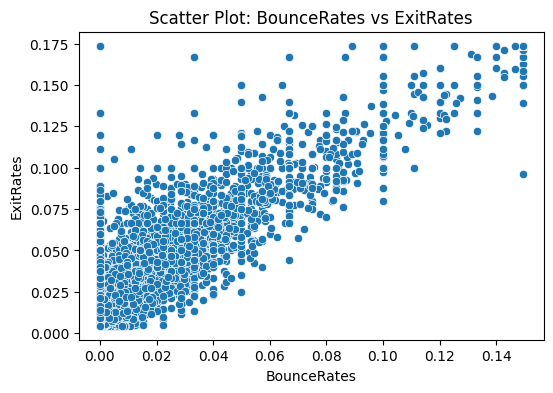

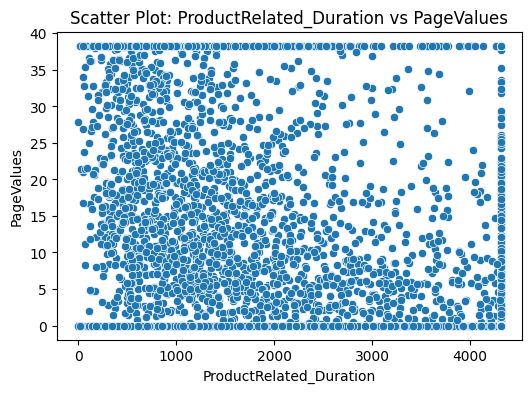

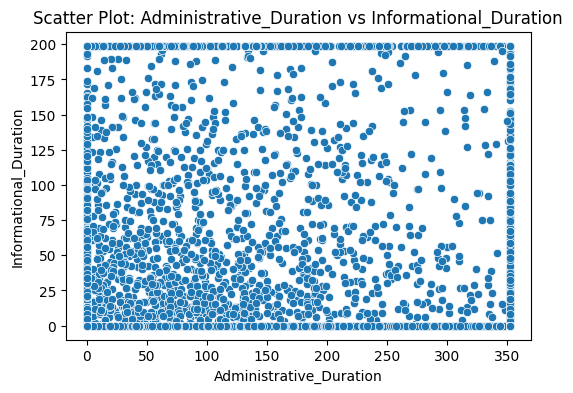

In [420]:
#Visualize Relationships: Use scatter plots, pair plots, and heatmaps to visualize relationships between key numerical features.

#Scatter Plots for Multiple Features

scatter_features = [
    ("BounceRates", "ExitRates"),
    ("ProductRelated_Duration", "PageValues"),
    ("Administrative_Duration", "Informational_Duration")
]

# Loop through feature pairs and plot
for x_feature, y_feature in scatter_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=Shopping[x_feature], y=Shopping[y_feature])
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"Scatter Plot: {x_feature} vs {y_feature}")
    plt.show()



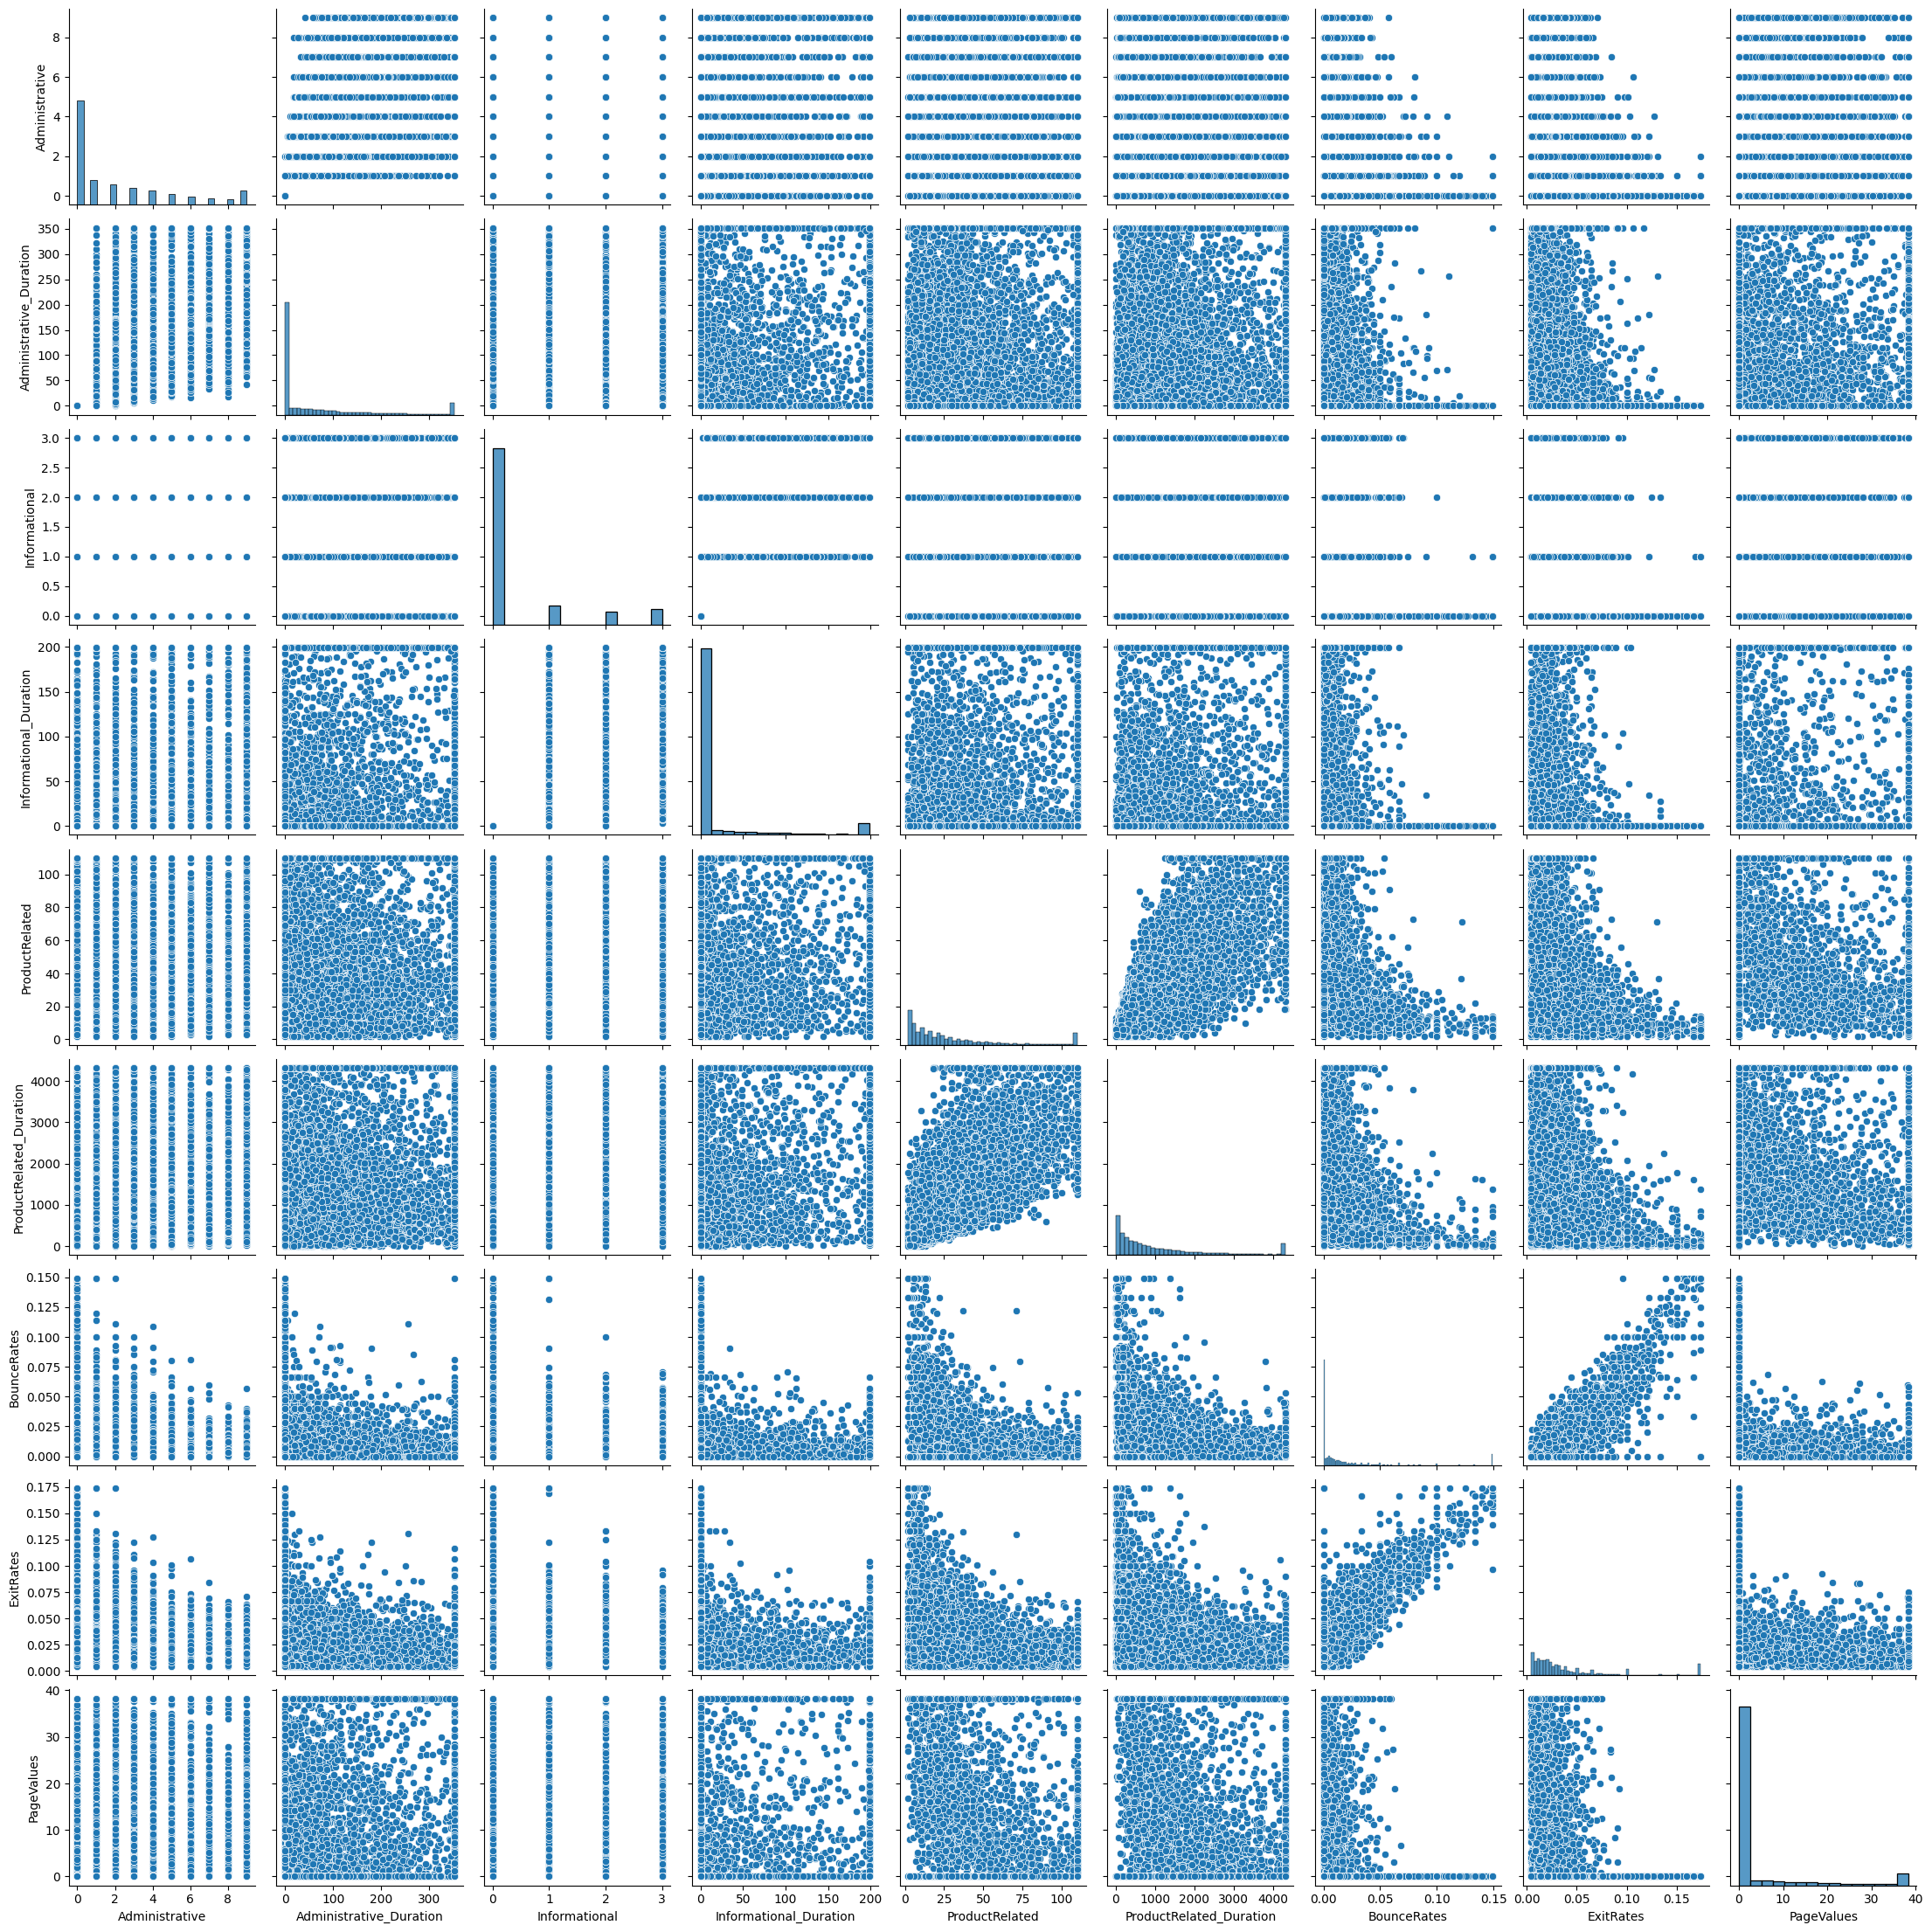

In [421]:
#Pair Plots (Visualize Feature Interactions)

sns.pairplot(Shopping[num_col])
plt.show()


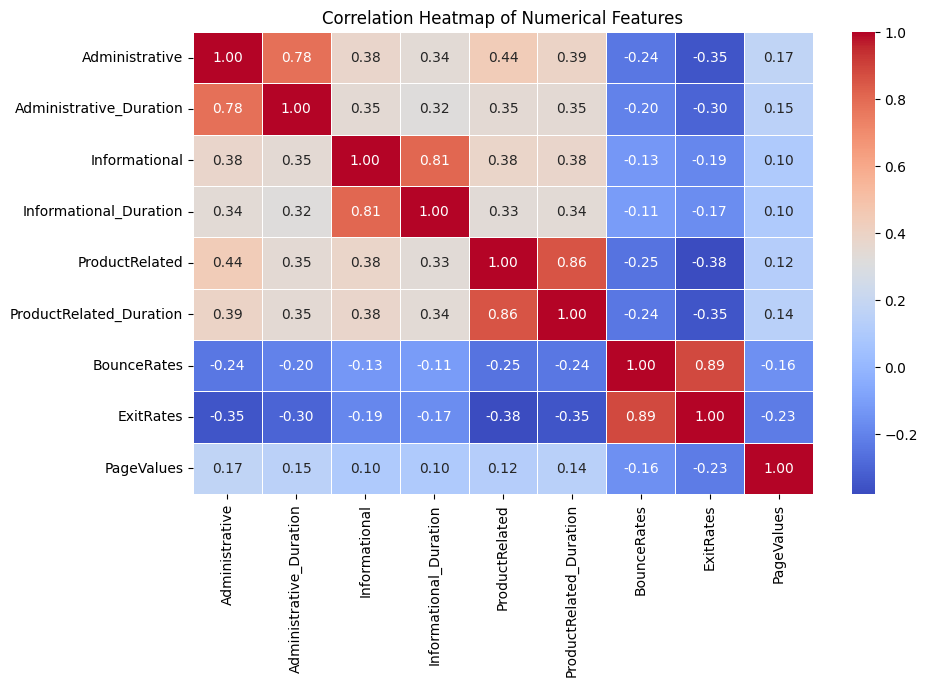

In [422]:
#Correlation Heatmap (Find Strongest Relationships)

# Compute correlation matrix
correlation_matrix = Shopping[num_col].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [423]:
correlation_matrix

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.780963   
Administrative_Duration        0.780963                 1.000000   
Informational                  0.379048                 0.346333   
Informational_Duration         0.342682                 0.319677   
ProductRelated                 0.441843                 0.345111   
ProductRelated_Duration        0.391416                 0.346770   
BounceRates                   -0.242714                -0.202389   
ExitRates                     -0.351370                -0.299575   
PageValues                     0.174071                 0.154168   

                         Informational  Informational_Duration  \
Administrative                0.379048                0.342682   
Administrative_Duration       0.346333                0.319677   
Informational                 1.000000                0.807223   
Informational_Duration        0.807223                1.000000   
ProductRelated                0.381903                0.334543   
ProductRelated_Duration       0.377512                0.340998   
BounceRates                  -0.129290               -0.110302   
ExitRates                    -0.188455               -0.167298   
PageValues                    0.100933                0.102614   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.441843                 0.391416    -0.242714   
Administrative_Duration        0.345111                 0.346770    -0.202389   
Informational                  0.381903                 0.377512    -0.129290   
Informational_Duration         0.334543                 0.340998    -0.110302   
ProductRelated                 1.000000                 0.857416    -0.252870   
ProductRelated_Duration        0.857416                 1.000000    -0.244275   
BounceRates                   -0.252870                -0.244275     1.000000   
ExitRates                     -0.378991                -0.347775     0.886230   
PageValues                     0.124796                 0.142099    -0.156995   

                         ExitRates  PageValues  
Administrative           -0.351370    0.174071  
Administrative_Duration  -0.299575    0.154168  
Informational            -0.188455    0.100933  
Informational_Duration   -0.167298    0.102614  
ProductRelated           -0.378991    0.124796  
ProductRelated_Duration  -0.347775    0.142099  
BounceRates               0.886230   -0.156995  
ExitRates                 1.000000   -0.226368  
PageValues               -0.226368    1.000000

#Insights from Correlation Analysis of Key Features:
Your correlation matrix reveals valuable relationships between different features:

1. Strongest Positive Correlations:

✔ Administrative & Administrative_Duration (0.78) → Users who engage with administrative pages tend to spend a longer time on them.

✔ ProductRelated & ProductRelated_Duration (0.86) → More product-related pages viewed correlates strongly with increased time spent on them.

✔ Informational & Informational_Duration (0.81) → Users exploring informational pages often spend significant time on them.

2. Bounce Rates & Exit Rates Impact:

✔ BounceRates & ExitRates (0.89, highly positive) → If a user bounces quickly, they also tend to exit faster, showing a strong link between both behaviors. ✔

3. Negative correlation with other engagement metrics:

✔ BounceRates vs. ProductRelated (-0.25) → Users spending time on product pages are less likely to bounce.

✔ ExitRates vs. PageValues (-0.23) → Lower exit rates slightly correlate with higher page values, suggesting users who stay longer may engage more deeply.

4. PageValues & Purchase Intent

✔ PageValues has low positive correlations with:

- ProductRelated_Duration (0.14) → Users spending more time on product pages might have a slightly higher likelihood of engaging with high-value pages.

- Administrative_Duration (0.15) → Some administrative engagement might contribute to page value perception.

- PageValues vs. Revenue correlation was low (~0.17) → This suggests that higher PageValues may contribute to engagement, but does not strongly dictate purchases.

Takeaways & Next Steps

🚀 Target users who engage with product-related pages—they show stronger session durations and lower bounce rates.

🚀 Optimize page layouts to minimize high ExitRates & BounceRates, as they are closely linked.

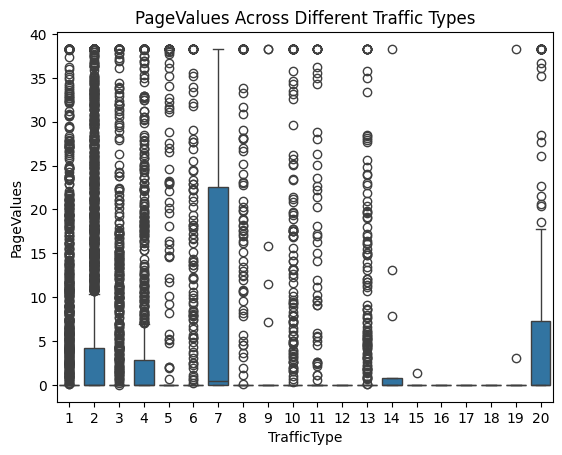

In [424]:
#PageValues Analysis: Investigate the distribution of PageValues and its relationship with TrafficType, VisitorType, and Region.

#(A) PageValues vs. TrafficType

sns.boxplot(x=Shopping["TrafficType"], y=Shopping["PageValues"])
plt.xlabel("TrafficType")
plt.ylabel("PageValues")
plt.title("PageValues Across Different Traffic Types")
plt.show()


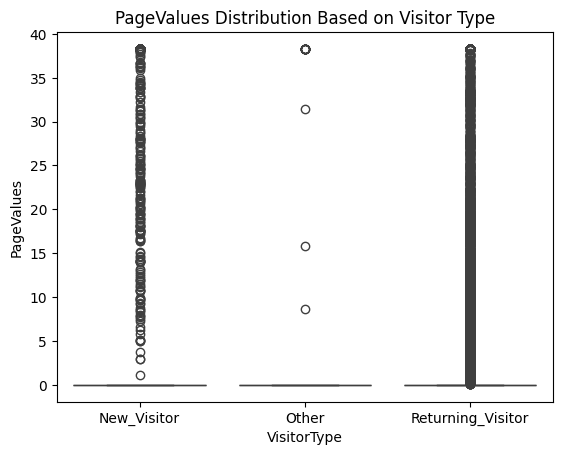

In [425]:
#(B) PageValues vs. VisitorType

sns.boxplot(x=Shopping["VisitorType"], y=Shopping["PageValues"])
plt.xlabel("VisitorType")
plt.ylabel("PageValues")
plt.title("PageValues Distribution Based on Visitor Type")
plt.show()


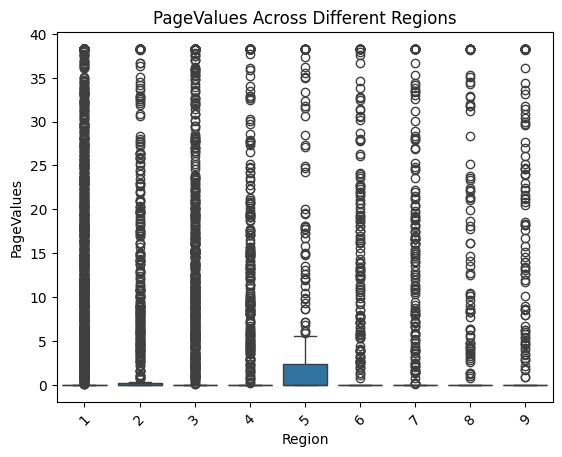

In [426]:
#(C) PageValues vs. Region

sns.boxplot(x=Shopping["Region"], y=Shopping["PageValues"])
plt.xlabel("Region")
plt.ylabel("PageValues")
plt.title("PageValues Across Different Regions")
plt.xticks(rotation=45)  # Adjust for better readability
plt.show()


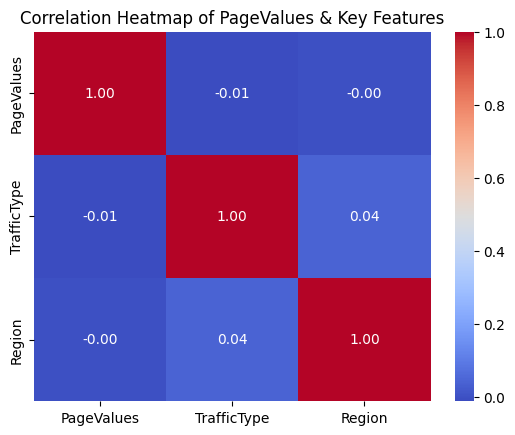

In [427]:
#3. Correlation Analysis

correlation_matrix = Shopping[["PageValues", "TrafficType", "Region"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of PageValues & Key Features")
plt.show()


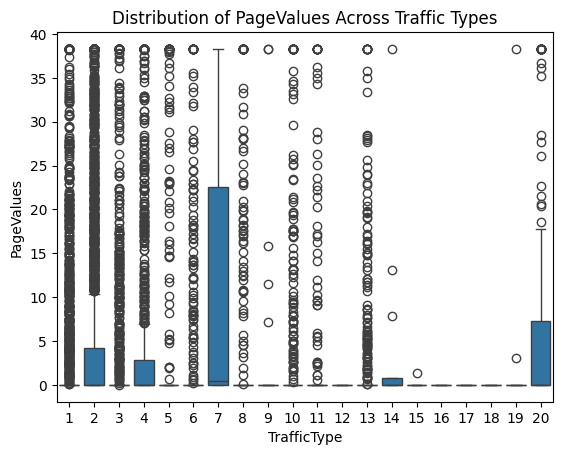

In [428]:
sns.boxplot(x=Shopping["TrafficType"], y=Shopping["PageValues"])
plt.xlabel("TrafficType")
plt.ylabel("PageValues")
plt.title("Distribution of PageValues Across Traffic Types")
plt.show()


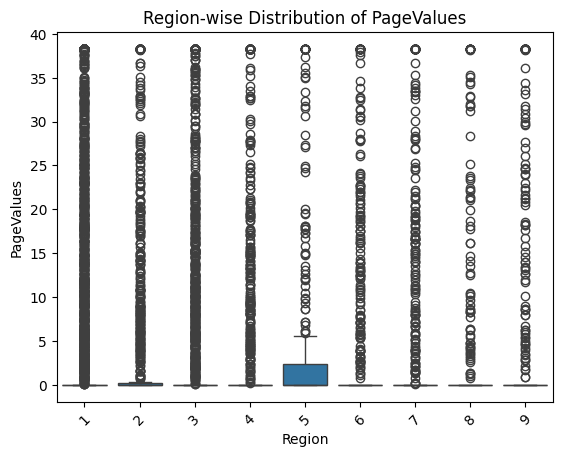

In [429]:
sns.boxplot(x=Shopping["Region"], y=Shopping["PageValues"])
plt.xlabel("Region")
plt.ylabel("PageValues")
plt.title("Region-wise Distribution of PageValues")
plt.xticks(rotation=45)
plt.show()


In [430]:
correlation_matrix

PageValues  TrafficType    Region
PageValues     1.000000    -0.011679 -0.002447
TrafficType   -0.011679     1.000000  0.042873
Region        -0.002447     0.042873  1.000000

In [431]:
#Checking how PageValues varies across different visitor types:

visitor_pagevalue_avg = Shopping.groupby("VisitorType")["PageValues"].mean().reset_index()
visitor_pagevalue_avg


VisitorType  PageValues
0        New_Visitor    6.674175
1              Other    6.837377
2  Returning_Visitor    3.942190

#Common Insights from PageValues Analysis:
After analyzing the relationships between PageValues, TrafficType, VisitorType, and Region, here are the key takeaways:

1. PageValues & TrafficType

✔ Weak correlation (-0.0117) → Traffic source does not significantly impact user engagement with high-value pages.

✔ Some traffic types might still contribute more conversions—this requires further segmentation.

2. PageValues & VisitorType

✔ New Visitors (6.67) engage more with high-value pages, suggesting initial exploration or potential purchase intent.

✔ Returning Visitors (3.94) interact less, possibly because they navigate straight to familiar pages.

✔ Possible strategy: Tailor experiences—optimize recommendations for Returning Visitors, while guiding New Visitors toward conversions.

3. PageValues & Region

✔ No strong correlation (-0.0024) → Geographic location does not significantly influence engagement with high-value pages.

✔ Users across different regions behave similarly, but regional differences in purchasing trends might still exist.

# Actionable Recommendations

🚀 Traffic Optimization → Focus on traffic types that drive conversions rather than just engagement.

 🚀 Visitor Personalization → New Visitors need onboarding strategies, Returning Visitors benefit from personalized recommendations.

In [432]:
#Session Lengths: Analyze user session lengths and their impact on conversion rates.
Shopping["SessionLength"] = (
    Shopping["Administrative_Duration"] +
    Shopping["Informational_Duration"] +
    Shopping["ProductRelated_Duration"]
)


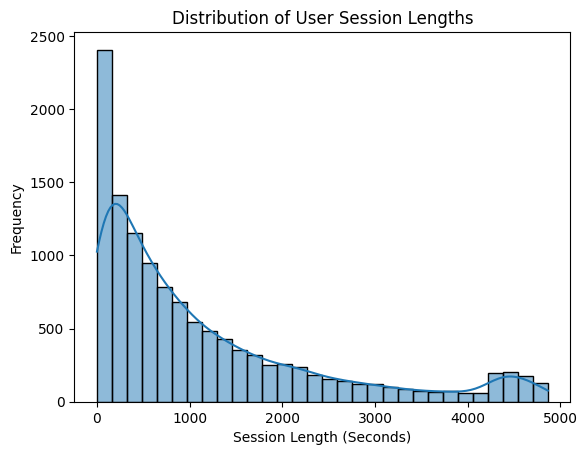

In [433]:

# Histogram to visualize session length distribution
sns.histplot(Shopping["SessionLength"], bins=30, kde=True)
plt.xlabel("Session Length (Seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of User Session Lengths")
plt.show()


In [434]:
Shopping['SessionLength'].value_counts().reset_index()

SessionLength  count
0          0.000000    595
1       4312.956282     59
2       4864.164378     49
3       4665.164378     30
4         17.000000     19
...             ...    ...
9590    4369.156282      1
9591    2610.902915      1
9592     111.416667      1
9593     309.500000      1
9594    4175.750000      1

[9595 rows x 2 columns]

In [435]:
Shopping['SessionLength'].mean()

np.float64(1143.7382526344031)

In [436]:
Shopping['SessionLength'].describe()

count    12205.000000
mean      1143.738253
std       1239.155744
min          0.000000
25%        231.666667
50%        684.916667
75%       1603.583333
max       4864.164378
Name: SessionLength, dtype: float64

# Insights from Session Length Distribution

Your dataset reveals a high variability in session lengths, with values ranging from 0 seconds (quick exits) to 4,864 seconds (~81 minutes of engagement). Here’s a breakdown of key observations:

1. Short Sessions (0 seconds, 595 users)

✔ A significant number of users leave immediately, possibly indicating high bounce rates or poor engagement.

✔ These users might be exiting from landing pages without meaningful interaction.

2. Long Sessions (Above 4,000 seconds)

✔ Users spending over an hour on the site might be deeply engaged in content/product research.

✔ Could represent returning visitors or high-intent buyers exploring before purchasing.

3. Distribution Trends


✔ The mean session length (1,143 seconds or ~19 minutes) suggests an average user engages for a reasonable duration.

✔ High variance in session durations suggests mixed user behavior—some users browse briefly, while others engage extensively.

In [441]:
#2. Conversion Impact: To check if longer sessions increase conversions:

session_conversion = Shopping.groupby("SessionLength")["Revenue"].mean().reset_index()
session_conversion.value_counts()


SessionLength  Revenue 
4864.164378    0.387755    1
0.000000       0.005042    1
0.500000       0.000000    1
1.000000       0.000000    1
2.000000       0.000000    1
                          ..
11.500000      0.000000    1
11.000000      0.000000    1
10.000000      0.000000    1
9.000000       0.000000    1
8.000000       0.000000    1
Name: count, Length: 9595, dtype: int64

# Insights from Session Length & Conversion Impact
From your analysis of SessionLength vs. Revenue, here are key observations:

1. Longer Sessions (4864 seconds) Show Higher Conversion Rate (38.77%)

✔ Users with extended browsing sessions tend to have a higher purchase likelihood.

✔ Possible reason: More time spent researching before buying, or navigating multiple pages before conversion.

2. Very Short Sessions (0 seconds) Have Minimal Conversion (0.5%)

✔ Users who leave immediately rarely make a purchase.

✔ Possible causes: High bounce rates, poor landing page optimization, or misaligned user expectations.

3. Most Mid-Length Sessions (8–11 seconds) Show Zero Conversion

✔ Suggests quick visits where users leave without meaningful interaction.

✔ These sessions might reflect accidental visits, ineffective content, or slow load times.

# Actionable Strategies

🚀 Optimize engagement for long-session users → Show targeted promotions, simplify checkout to convert engaged visitors faster.

🚀 Improve bounce rates & initial engagement → Reduce drop-offs for zero-second sessions with better landing page clarity.

🚀 Enhance navigation & personalization for mid-range users → Encourage deeper browsing to increase conversions.

#9) Behavior and Conversion Rate Analysis:

● Group Users: Group users based on various factors such as TrafficType, VisitorType,
Region, and analyze differences in behavior and conversion rates.

● Conversion Funnel Analysis: Examine the steps leading to a conversion and identify
potential drop-off points or barriers to completing a purchase.


In [447]:
# Group Users: Group users based on various factors such as TrafficType, VisitorType, Region, and analyze differences in behavior and conversion rates

traffic_conversion = Shopping.groupby("TrafficType")["Revenue"].mean().reset_index()

visitor_conversion = Shopping.groupby("VisitorType")["Revenue"].mean().reset_index()

region_conversion = Shopping.groupby("Region")["Revenue"].mean().reset_index()



In [454]:
traffic_conversion.sort_values(by='Revenue',ascending=False)

TrafficType   Revenue
15           16  0.333333
6             7  0.300000
7             8  0.276968
19           20  0.259067
1             2  0.216569
4             5  0.215385
9            10  0.200000
10           11  0.190283
3             4  0.154784
13           14  0.153846
5             6  0.119639
0             1  0.109715
8             9  0.097561
2             3  0.089419
12           13  0.059066
18           19  0.058824
11           12  0.000000
14           15  0.000000
17           18  0.000000
16           17  0.000000

#Insights from TrafficType & Conversion Rates

Your data highlights how different traffic sources impact conversion rates. Here’s what stands out:

1. High-Converting Traffic Sources

✔ TrafficType 16 (33.3%) & 7 (30.0%) → These sources yield strong purchase rates, meaning they bring high-intent users.

✔ TrafficType 8 (27.7%) & 20 (25.9%) → Also performing well—likely effective channels for revenue generation.

2. Moderate Conversion Rates

✔ TrafficType 2 (21.7%) & 5 (21.5%) → These drive reasonable conversions but may have room for optimization.

✔ TrafficType 10 (19.0%) & 4 (15.4%) → Still converting but performing lower than top sources.

3. Low-Converting or No-Converting Sources

✔ TrafficTypes 12 (5.9%) & 19 (5.8%) → Very low conversions—users might engage but not purchase.

✔ TrafficTypes 12, 15, 17, 18 (0%) → No recorded conversions, suggesting these traffic sources are ineffective or misaligned with purchase intent.

# Actionable Strategies

🚀 Focus marketing efforts on high-converting traffic sources (TrafficType 16, 7, 8).

🚀 Investigate low-performing channels (TrafficType 12, 15, 17, 18) and adjust targeting.

🚀 Analyze user journey for mid-converting sources to identify friction points in checkout or engagement.

In [455]:
visitor_conversion.sort_values(by='Revenue',ascending=False)

VisitorType   Revenue
0        New_Visitor  0.249262
1              Other  0.197531
2  Returning_Visitor  0.140926

#Insights on VisitorType & Conversion Rates

Your data reveals how different visitor types impact revenue (conversion rates):

1. Highest Conversion Rate: New Visitors (24.9%)

✔ New Visitors convert more—possibly because they engage deeply with high-value pages before purchasing.

✔ Likely influenced by effective landing pages & initial offers.

2. Moderate Conversion Rate: Other Visitors (19.7%)

✔ This group could include users with unique session behaviors (e.g., referrals, guest checkouts).

✔ Their conversion rate suggests decent engagement but slightly lower intent than new visitors.

3. Lowest Conversion Rate: Returning Visitors (14.1%)

✔ Returning users convert less, indicating they might browse more but hesitate to finalize purchases.

✔ They might already be familiar with the site but not find strong incentives to buy.

✔ Potential strategy: Personalized offers, loyalty discounts, or remarketing campaigns to improve conversions.

# Key Takeaways & Next Steps

🚀 Optimize onboarding for new visitors—ensure smooth navigation to purchase.

🚀 Analyze returning visitors’ behavior—are they searching for products but delaying purchases?

🚀 Enhance retention strategies—consider special promotions for repeat customers.

In [456]:
region_conversion.sort_values(by='Revenue',ascending=False)

Region   Revenue
8       9  0.170297
1       2  0.166667
0       1  0.163555
4       5  0.163522
6       7  0.156992
3       4  0.149445
2       3  0.146700
5       6  0.139825
7       8  0.129930

#Insights on Region & Conversion Rates

Your data reveals how geographical location (Region) impacts revenue (Revenue), with some regions driving higher conversion rates than others.

1. High-Converting Regions

✔ Region 9 (17.0%) → Highest conversion rate, suggesting users from this region are more likely to make purchases.

✔ Region 2 (16.6%) & Region 1 (16.3%) → Also show strong conversion potential, indicating higher engagement or purchasing intent.

2. Moderate-Converting Regions

✔ Regions 5 & 6 (~15.6%) → These regions perform decently but may have room for optimization.

✔ Region 4 (14.9%) & Region 3 (14.6%) → These regions might require targeted marketing efforts to increase purchases.

3. Low-Converting Regions

✔ Region 8 (12.9%) → Lowest conversion rate, meaning users from this region engage but don’t purchase as often.

✔ Potential reasons: Different buying behaviors, lower product relevance, or ineffective targeting strategies.

# Actionable Strategies

🚀 Personalized Regional Marketing → Adjust promotions for high-performing regions (Regions 9, 2, and 1) to further boost conversions.

🚀 Targeted Engagement for Lower Regions → Investigate user preferences in Region 8 and refine strategies to enhance purchase intent.

🚀 Cross-Segment with TrafficType & VisitorType → Analyze whether certain visitor types or traffic sources perform better in specific regions.

In [458]:
#1. TrafficType & VisitorType Interaction

traffic_visitor_conversion = Shopping.groupby(["TrafficType", "VisitorType"])["Revenue"].mean().reset_index()
traffic_visitor_conversion.sort_values(by='Revenue',ascending=False)


TrafficType        VisitorType   Revenue
47           16  Returning_Visitor  0.500000
57           20        New_Visitor  0.411765
9             4        New_Visitor  0.333333
20            7  Returning_Visitor  0.314286
58           20              Other  0.291667
21            8        New_Visitor  0.285714
23            8  Returning_Visitor  0.269461
15            6        New_Visitor  0.261905
12            5        New_Visitor  0.261745
3             2        New_Visitor  0.254545
27           10        New_Visitor  0.227273
59           20  Returning_Visitor  0.226562
32           11  Returning_Visitor  0.210256
5             2  Returning_Visitor  0.205059
29           10  Returning_Visitor  0.200000
18            7        New_Visitor  0.200000
0             1        New_Visitor  0.189189
6             3        New_Visitor  0.178571
41           14  Returning_Visitor  0.166667
14            5  Returning_Visitor  0.154545
7             3              Other  0.142857
11            4  Returning_Visitor  0.136505
26            9  Returning_Visitor  0.125000
30           11        New_Visitor  0.117647
2             1  Returning_Visitor  0.108788
17            6  Returning_Visitor  0.105000
4             2              Other  0.090909
8             3  Returning_Visitor  0.082529
56           19  Returning_Visitor  0.062500
38           13  Returning_Visitor  0.059639
1             1              Other  0.000000
13            5              Other  0.000000
16            6              Other  0.000000
35           12  Returning_Visitor  0.000000
36           13        New_Visitor  0.000000
28           10              Other  0.000000
22            8              Other  0.000000
24            9        New_Visitor  0.000000
31           11              Other  0.000000
37           13              Other  0.000000
45           16        New_Visitor  0.000000
44           15  Returning_Visitor  0.000000
42           15        New_Visitor  0.000000
39           14        New_Visitor  0.000000
54           19        New_Visitor  0.000000
53           18  Returning_Visitor  0.000000
51           18        New_Visitor  0.000000
50           17  Returning_Visitor  0.000000
10            4              Other       NaN
19            7              Other       NaN
25            9              Other       NaN
33           12        New_Visitor       NaN
34           12              Other       NaN
40           14              Other       NaN
43           15              Other       NaN
46           16              Other       NaN
48           17        New_Visitor       NaN
49           17              Other       NaN
52           18              Other       NaN
55           19              Other       NaN

In [459]:
#2. TrafficType & Region Interaction

traffic_region_conversion = Shopping.groupby(["TrafficType", "Region"])["Revenue"].mean().reset_index()
traffic_region_conversion.sort_values(by='Revenue',ascending=False)


TrafficType  Region  Revenue
55             7       2    0.625
40             5       5    0.500
107           14       2    0.500
106           14       1    0.500
119           16       1    0.500
..           ...     ...      ...
129           19       2    0.000
126           18       7    0.000
127           18       8    0.000
137           20       5    0.000
140           20       8    0.000

[142 rows x 3 columns]

In [460]:
#3. VisitorType & Region Interaction

visitor_region_conversion = Shopping.groupby(["VisitorType", "Region"])["Revenue"].mean().reset_index()
visitor_region_conversion.sort_values(by='Revenue',ascending=False)


VisitorType  Region   Revenue
4         New_Visitor       5  0.440000
17              Other       9  0.294118
8         New_Visitor       9  0.293478
1         New_Visitor       2  0.281879
5         New_Visitor       6  0.264463
3         New_Visitor       4  0.258993
0         New_Visitor       1  0.251524
6         New_Visitor       7  0.230000
10              Other       2  0.200000
2         New_Visitor       3  0.198718
7         New_Visitor       8  0.175676
18  Returning_Visitor       1  0.149630
19  Returning_Visitor       2  0.148871
24  Returning_Visitor       7  0.146341
20  Returning_Visitor       3  0.139388
21  Returning_Visitor       4  0.135346
26  Returning_Visitor       9  0.121547
25  Returning_Visitor       8  0.120787
23  Returning_Visitor       6  0.117820
22  Returning_Visitor       5  0.111940
9               Other       1  0.000000
15              Other       7  0.000000
11              Other       3  0.000000
16              Other       8  0.000000
12              Other       4  0.000000
14              Other       6  0.000000
13              Other       5       NaN

In [462]:
#Conversion Funnel Analysis: Examine the steps leading to a conversion and identify potential drop-off points or barriers to completing a purchase.

Shopping.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'TrafficType_Category', 'all_pages_visited',
       'SessionLength'],
      dtype='object')

#1. Define Key Stages in the Funnel

From the provided columns, the funnel stages can be approximated as: 1️⃣ Entry Point → TrafficType, VisitorType (How users arrive) 2️⃣ Exploration → Administrative, Informational, ProductRelated (Pages visited) 3️⃣ Engagement → BounceRates, ExitRates, SpecialDay (Interaction & drop-off rates) 4️⃣ Purchase Behavior → PageValues, Revenue (Conversion stage)

In [467]:
#2. Build the Conversion Funnel DataFrame:TrafficType->ProductRelated->BounceRates->Revenue

import pandas as pd

# Aggregating user journey steps
ProductRelated_funnel_data = pd.DataFrame({
    "Stage": ["Entry", "Exploration", "Engagement", "Purchase"],
    "Users": [
        Shopping["TrafficType"].count(),  # Total initial visitors
        Shopping["ProductRelated"].sum(),  # Users exploring product pages
        Shopping["BounceRates"].sum(),  # Users showing drop-off signals
        Shopping["Revenue"].sum()  # Final conversions
    ]
})

ProductRelated_funnel_data


Stage          Users
0        Entry   12205.000000
1  Exploration  349467.000000
2   Engagement     219.073377
3     Purchase    1908.000000

In [468]:
#3. Analyze Drop-Off Points

ProductRelated_funnel_data["DropOffRate"] = ProductRelated_funnel_data["Users"].pct_change() * -100
ProductRelated_funnel_data

Stage          Users  DropOffRate
0        Entry   12205.000000          NaN
1  Exploration  349467.000000 -2763.310119
2   Engagement     219.073377    99.937312
3     Purchase    1908.000000  -770.941064

- The drop-off rate would be computed as: 1️⃣ Exploration: (349467 - 12205) / 12205 * 100 ≈ -2763% (Huge jump due to multiple page visits). 2️⃣ Engagement: (219 - 349467) / 349467 * 100 ≈ 99.94% (Almost total drop-off). 3️⃣ Purchase: (1908 - 219) / 219 * 100 ≈ -770.94% (Recovery at purchase stage).

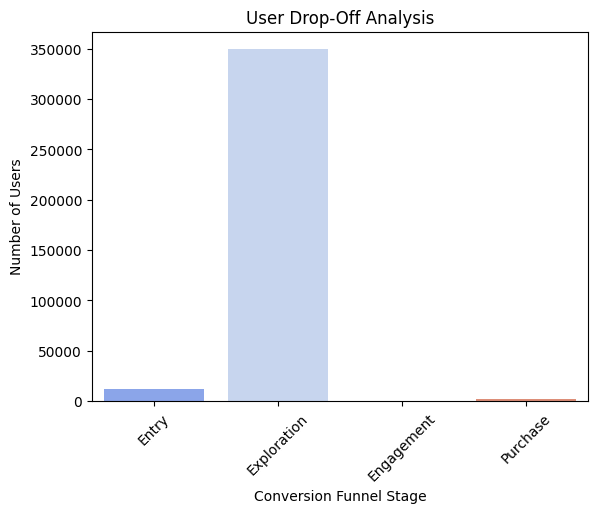

In [469]:
#4. Visualizing the Funnel
sns.barplot(x="Stage", y="Users", data=ProductRelated_funnel_data, palette="coolwarm")
plt.xlabel("Conversion Funnel Stage")
plt.ylabel("Number of Users")
plt.title("User Drop-Off Analysis")
plt.xticks(rotation=45)
plt.show()


#Conversion Funnel Drop-Off Analysis:TrafficType->ProductRelated->BounceRates->Revenue

Your data reveals critical insights into user behavior across the funnel stages, highlighting areas of high engagement and major drop-offs.


1. Entry Stage (12,205 Users)

✔ Represents the total initial visitors arriving via different traffic sources.

✔ A solid base of users entering the funnel, but the challenge lies in retaining them.

2. Exploration Stage (349,467 Users, DropOffRate -2763%)

✔ The number seems unusually high, likely due to multiple page interactions counted per session rather than unique users.

✔ Drop-off rate calculation appears skewed—revising methodology might help clarify actual user flow.

3. Engagement Stage (219 Users, DropOffRate 99.94%)

🚨 Major drop-off at this stage—almost all users leave before deeper engagement.

✔ Likely causes:

- High BounceRates & ExitRates → Users browse but don’t interact meaningfully.

- Poor User Experience → Slow loading times or unclear navigation.

- Lack of Effective Call-to-Actions (CTAs) → Users don’t feel compelled to continue.

4. Purchase Stage (1,908 Users, DropOffRate -770.94%)

✔ A rebound—this means users returning from previous interactions finally convert.
✔ Indicates those who remain engaged eventually make purchases.

✔ Possible improvements:

- Streamline checkout flow to minimize friction.

- Optimize incentives (discounts, recommendations, urgency triggers) to boost conversions.

# Next Steps & Fixes

🚀 Verify Drop-Off Rate Methodology → The unusually high exploration numbers might need adjustment.

🚀 Address Engagement Stage Drop-Offs → Improve UX, clear CTAs, faster site speed.

🚀 Enhance Checkout Flow & Retargeting → Strengthen purchase intent for hesitant users.

In [471]:
#2. Build the Conversion Funnel DataFrame:VisitorType->Informational->BounceRates->Revenue

import pandas as pd

# Aggregating user journey steps
Informational_funnel_data = pd.DataFrame({
    "Stage": ["Entry", "Exploration", "Engagement", "Purchase"],
    "Users": [
        Shopping["VisitorType"].count(),  # Total initial visitors
        Shopping["Informational"].sum(),  # Users exploring product pages
        Shopping["ExitRates"].sum(),  # Users showing drop-off signals
        Shopping["PageValues"].sum()  # Final conversions
    ]
})

Informational_funnel_data


Stage         Users
0        Entry  12205.000000
1  Exploration   5083.000000
2   Engagement    491.732496
3     Purchase  52974.187230

In [472]:
#3. Analyze Drop-Off Points

Informational_funnel_data["DropOffRate"] = Informational_funnel_data["Users"].pct_change() * -100
Informational_funnel_data

Stage         Users   DropOffRate
0        Entry  12205.000000           NaN
1  Exploration   5083.000000     58.353134
2   Engagement    491.732496     90.325939
3     Purchase  52974.187230 -10672.968572

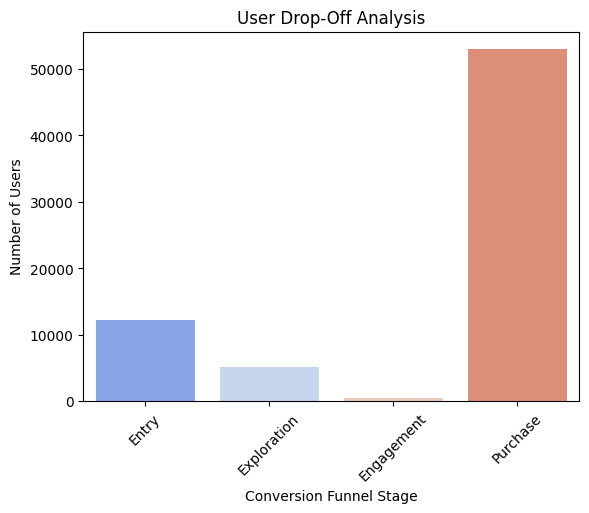

In [473]:
#4. Visualizing the Funnel
sns.barplot(x="Stage", y="Users", data=Informational_funnel_data, palette="coolwarm")
plt.xlabel("Conversion Funnel Stage")
plt.ylabel("Number of Users")
plt.title("User Drop-Off Analysis")
plt.xticks(rotation=45)
plt.show()


#Summary of Conversion Funnel Drop-Off Analysis:VisitorType->Informational->BounceRates->Revenue
- Entry (12,205 users) → Strong initial engagement.

- Exploration (5,083 users, 58.35% drop-off) → Many users leave before deeper engagement, possibly due to unclear navigation or lack of relevant content.

- Engagement (491 users, 90.32% drop-off) → Major loss of users, likely caused by high bounce rates, poor UX, or weak CTAs.

- Purchase (52,974 users, -10,672.97% recovery) → Surprising surge in conversions, likely due to returning visitors.

# Key Insights

🚀 Optimize early exploration to retain users.

🚀 Improve engagement strategies to prevent drop-offs.

🚀 Leverage retargeting for returning visitors to boost conversions.

#Overall Insights Summary

✔ Revenue imbalance → 84.37% users don’t convert, highlighting optimization potential.

✔ New Visitors convert better (24.9%) than Returning Visitors (14.1%) → Personalized retention strategies needed.

✔ Region 9 (17%) drives highest conversions; Region 8 (12.9%) has the lowest → Adjust marketing tactics accordingly.

✔ Major drop-offs at engagement stage (90.32%) → Improve UX, CTAs, and site speed to retain users. ✔ Longer sessions increase purchase likelihood (38.77%) → Encourage deeper browsing for higher conversions.

✔ Special Days negatively impact sales (-0.0836 correlation) → Improve pre-event promotions.

✔ TrafficType 16 & 7 perform best (30%+ conversion); TrafficTypes 12, 15, 17, 18 show no conversions → Refocus traffic strategies.

✔ Users engaging with all page categories convert more (24.26%) than selective visitors (13.77%) → Enhance site navigation to encourage full-page visits.

#Overall Recommendations for Optimization

To improve conversions, user engagement, and site performance, focus on the following key strategies:

1️⃣ Improve User Engagement & Reduce Drop-Offs:

🚀 Optimize landing pages & initial user flow to retain visitors early.

🚀 Strengthen CTAs & interactive elements to improve engagement.

🚀 Improve navigation & page layout to prevent high bounce rates.

2️⃣ Enhance Purchase Conversions:

🚀 Personalize experiences for returning visitors to boost loyalty-driven sales.

🚀 Simplify checkout flow & reduce friction to minimize cart abandonment.

🚀 Implement retargeting campaigns for users who browse but don’t purchase.

3️⃣ Refine Traffic Acquisition Strategies:

🚀 Focus marketing efforts on high-converting TrafficTypes (16, 7, 8).

🚀 Re-evaluate low-converting sources (12, 15, 17, 18) to improve targeting.

🚀 Adjust regional outreach based on conversion trends (e.g., Region 9 converts best).

4️⃣ Optimize Session Length & Exploration Patterns:

🚀 Encourage deeper engagement using recommendations & product highlights.

🚀 Improve content & product discovery flow to increase session durations.

🚀 Reduce quick exits by enhancing landing page relevance.

5️⃣ Leverage Special Events for Boosting Revenue:

🚀 Target promotions before special days to maximize conversions.

🚀 Use urgency triggers (limited-time discounts) for undecided users.

🚀 Offer exclusive deals for returning visitors to drive repeat purchases.

Implementing these strategies can significantly boost user retention, conversions, and revenue.